In [1]:
import io
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


In [2]:
DATA = np.genfromtxt('11_09_Nacho_Aye.TXT')#, delimiter='\t')
#subteB16 = np.genfromtxt('datos_subteB_16-9.txt')
"""
DATA[:,0] #Tiempo
DATA[:,i] #Voltaje Si
"""

'\nDATA[:,0] #Tiempo\nDATA[:,i] #Voltaje Si\n'

In [0]:
Sarmiento11 = DATA[27:22815,:]
UrqB13 = DATA[22816:79619,:]
UrqB16 = DATA[79641:112975,:]

# En el Sarmiento el S0, S9 y S14 se salieron
# En el Subte B del 13/9 el S1 y el S5 se desconectaron
# En el Subte B del 16/9

color=[(0/255.0, 255/255.0, 0/255.0), (0/255.0, 0/255.0, 255/255.0), (50/255.0, 240/255.0, 255/255.0), (240/255.0, 50/255.0, 230/255.0), 
       (179/255.0, 179/255.0, 0/255.0), (0/255.0, 128/255.0, 128/255.0), (240/255.0, 195/255.0, 255/255.0), (170/255.0, 110/255.0, 40/255.0),
       (0/255.0, 0/255.0, 0/255.0), (128/255.0, 0/255.0, 0/255.0), (255/255.0, 0/255.0, 0/255.0), (245/255.0, 130/255.0, 48/255.0),
       (0/255.0, 0/255.0, 128/255.0), (135/255.0, 200/255.0, 220/255.0), (153/255.0, 51/255.0, 255/255.0), (50/255.0, 50/255.0, 50/255.0)]
       
font = {'family' : 'serif', 'weight' : 'normal'}

In [0]:
#Urquiza+Subte B+13/09
t_estaciones=[35+59/60,38+9/60,40+44/60,42+23/60,45+20/60,46+51/60,48+44/60,50+50/60,52+32/60,54+7/60,55+45/60,58+54/60,59+4/60]
#t_estaciones

"""
33:59/60,
35:43/60,
38:25/60,
40:01/60,
42:20/60,
44:11/60,
46:02/60,
47:48/60,
49:27/60,
51:03/60,
52:37
54:02
54:32
54:59
"""

'\n33:59/60,\n35:43/60,\n38:25/60,\n40:01/60,\n42:20/60,\n44:11/60,\n46:02/60,\n47:48/60,\n49:27/60,\n51:03/60,\n52:37\n54:02\n54:32\n54:59\n'

In [0]:
## PARA CAMBIAR EL FORMATO DEL TIEMPO DE LAS BITACORAS 
t_inc = open('incomodidad.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text=t_inc.read()
t_inc.close()
prueba=text.split(';')
T_inc = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_inc.append(aux)#, float[newx]) #EN MINUTOS
  
t_noinc = open('finincomodidad.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text=t_noinc.read()
t_noinc.close()
prueba=text.split(';')
T_noinc = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_noinc.append(aux)#, float[newx]) #EN MINUTOS

t_AP = open('abrepuerta.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text=t_AP.read()
t_AP.close()
prueba=text.split(';')
T_AP = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_AP.append(aux)#, float[newx]) #EN MINUTOS
  
t_CP = open('cierrapuerta.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text=t_CP.read()
t_CP.close()
prueba=text.split(';')
T_CP = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_CP.append(aux)#, float[newx]) #EN MINUTOS
  
t_GE = open('espalda.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text = t_GE.read()
t_GE.close()
prueba = text.split(';')
T_GE = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_GE.append(aux)#, float[newx]) #EN MINUTOS  
  
t_GP = open('pecho.txt', mode='r')# dtype='str') #'rb' puede que sea modo lectura + "binary mode"
text = t_GP.read()
t_GP.close()
prueba=text.split(';')
T_GP = []
num = int(((len(prueba)+1)/2) - 1)
for i in range(num):
  (h, m, s) = (prueba[1+(2*i)].split(':'))
  aux = (float(int(h) * 3600 + int(m) * 60 + float(s)))/60
  T_GP.append(aux)#, float[newx]) #EN MINUTOS

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


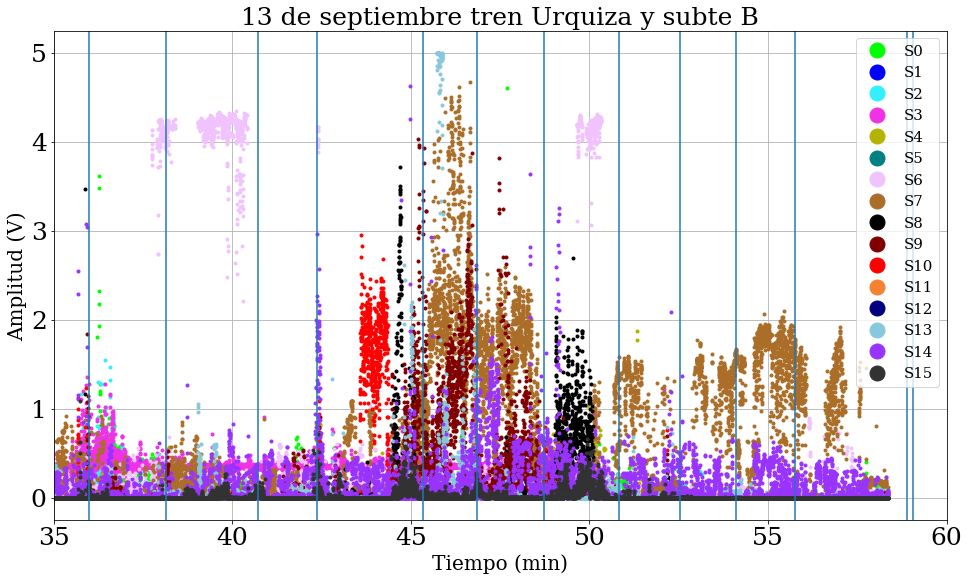

In [0]:
plt.figure(figsize=(16,9))
for i in range(16):
  plt.plot((UrqB13[:,0]-UrqB13[0,0])/60000, UrqB13[:,i+1]*5/1023,'.', color=color[i],label='S'+str(i))
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)', fontsize=20)
  plt.ylabel('Amplitud (V)', fontsize=20)
  plt.title('13 de septiembre tren Urquiza y subte B', fontsize=25)
  plt.xlim(35,60)
for i in range(13):
  plt.axvline(t_estaciones[i])
plt.legend(fontsize=15, markerscale=5)
plt.grid()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


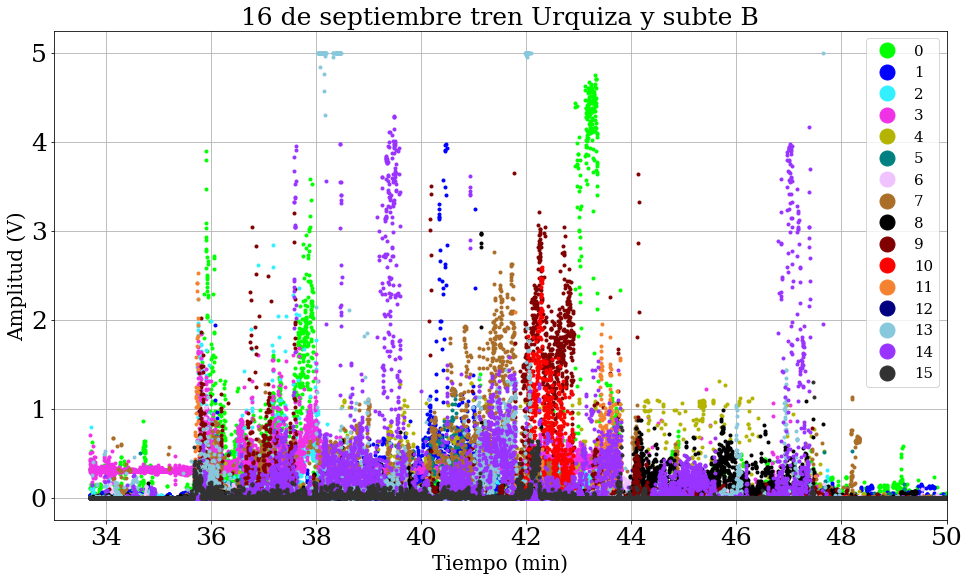

In [0]:
plt.figure(figsize=(16,9))
for i in range(16):
  plt.plot((UrqB16[:,0]-UrqB16[0,0])/60000, UrqB16[:,i+1]*5/1023, '.', color=color[i], label=str(i))
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)', fontsize=20)
  plt.ylabel('Amplitud (V)', fontsize=20)
  plt.title('16 de septiembre tren Urquiza y subte B', fontsize=25)
  plt.xlim(33,50)
"""
#plt.plot((UrqB16[:,0]-UrqB16[0,0])/60000, UrqB16[:,15]*5/1023,'.',label=str(14))
for j in range(len(T_inc)):
  plt.axvline(T_inc[j], c='r')#, label='Incomodidad')
for j in range(len(T_noinc)):
  plt.axvline(T_noinc[j], c='r')
#for k in range(len(T_inc)):
#  plt.fill_between([T_inc[k],T_noinc[k]], 0, 5, 'r', alpha=0.5)
for j in range(len(T_AP)):
  plt.axvline(T_AP[j], c='c', ls='--')#, label='Abren puertas')
for j in range(len(T_CP)):
  plt.axvline(T_CP[j], c='b', ls='--')#, label='Cierran puertas')
for j in range(len(T_GP)):
  plt.axvline(T_GP[j], c='m', ls='-.')#, label='Golpes pecho')
for j in range(len(T_GE)):
  plt.axvline(T_GE[j], c='g', ls='-.')#, label='Golpes espalda')
"""
plt.legend(fontsize=15, markerscale=5)
plt.grid()

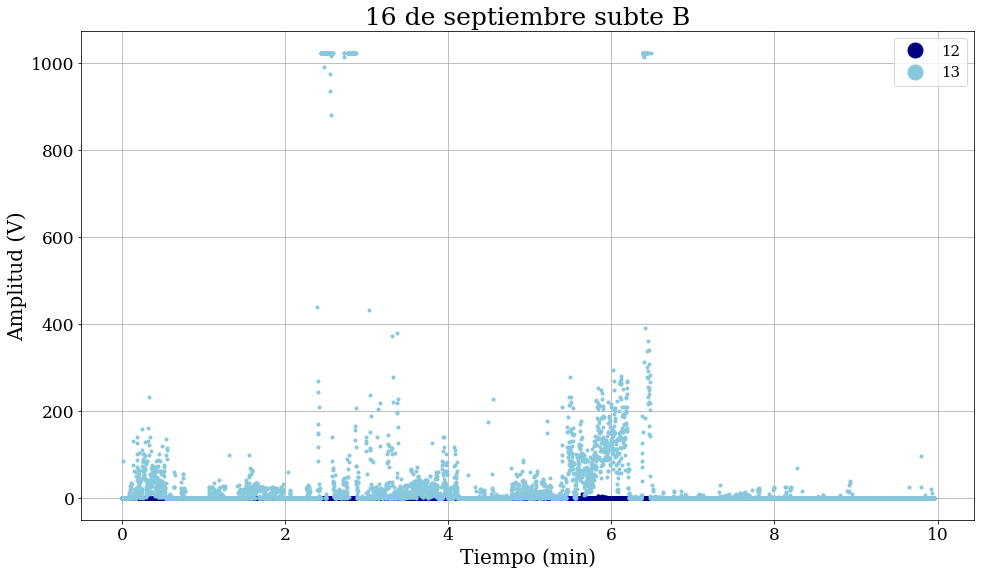

In [0]:
ini,fin = 21760, 28000
tiempo = (UrqB16[ini:fin,0]-UrqB16[ini,0])/60000
subteB16 = np.zeros((len(tiempo), 17))
for j in range (16):
  subteB16[:,j+1] = UrqB16[ini:fin,j+1]

plt.figure(figsize=(16,9))
for i in [12,13]:
  plt.plot(tiempo, subteB16[:,i+1], '.', color=color[i], label=str(i))
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)', fontsize=20)
  plt.ylabel('Amplitud (V)', fontsize=20)
  plt.title('16 de septiembre subte B', fontsize=25)
  #plt.xlim(33,50)
plt.legend(fontsize=15, markerscale=5, loc='upper right')
plt.grid()

In [0]:
"""
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = np.log((1+(c/b)*(y-a))**(-1/c))
  return x

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=loga(x, params[0], params[1], params[2])
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df
"""
def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, d, e, f):
  x = np.exp((y-d-200)/(180*e))+f-1.5
  return x

def prediccion(params,sigma,tiempo):
  fuerza = np.linspace(0,150,len(tiempo))
  err_f = 0.05
  yp, U, L = np.zeros(len(fuerza)), np.zeros(len(fuerza)), np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i] = loga(fuerza[i], params[0], params[1], params[2])
    U[i] = yp[i]+sigma
    L[i] = yp[i]-sigma
  return(L, U)
  
def conversion(lecturas,L,U,parametros):
  fuerza = np.linspace(0,150,len(lecturas))
  F_medio, F_inf, F_sup = [], [], []
  for lectura in lecturas:
    if inversa(lectura,parametros[0],parametros[1],parametros[2])<0:
      F_medio.append(0)
    else:
      F_medio.append(inversa(lectura,parametros[0],parametros[1],parametros[2]))
    if (U[0]<=lectura)&(U[-1]>=lectura):
      F_inf.append(fuerza[np.where(U>=lectura)[0][0]])
    elif(U[0]>=lectura):
      F_inf.append(0)
    else:
      F_inf.append(150)
    if (L[0]<=lectura)&(L[-1]>=lectura):
      F_sup.append(fuerza[np.where(L>=lectura)[0][0]])
    elif (L[-1]<=lectura):
      F_sup.append(1000)
    else:
      F_sup.append(0)
      
  #inf_sup = np.zeros((2,len(F_sup)))
  inf = np.array(F_medio)-np.array(F_inf)
  sup = np.array(F_sup)-np.array(F_medio)
  return(F_medio,F_inf,F_sup,inf,sup)

#Los parámetros y errores de los ajustes de la calibración para los 16 sensores 

sigma_sensores = [29.539461670534322,
  60.49559731024787,
 79.73415397691831,
  35.68269672817009,
  30.98727302034468,
  37.6528840972345,
  48.18579788284019,
  27.34625409985951,
  31.614848378910125,
  38.63106786188516,
  48.220645509993986,
  34.41971383693343,
 35.46054658331651,
  125.94526512964234,
  43.190491600349496,
 70.70048621251644] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


parametros = [[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
  [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
 [-226.0092869361351, 1.3365091296043523, 0.0916962324557033],
   [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
  [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
  [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
  [118.64916688983206, 0.8977671206620181, 1.166209260879641],
  [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
  [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
  [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
  [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
  [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
 [63.07105162735809, 0.9461098559988136, 1.1089271678934591],
 [-61.259525953147346, 1.1731321014496332, 0.8221642344864362],
 [-40.75024235353535, 1.0353719488769222, 0.8710074314465065],
 [-103.8234091432016, 0.8413074702374649, 0.5913319206622106]] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes

alpha = 0.5
"""
parametrosbis=[[-1696.2056075183846, 1.057276361256899, -4.440634933744634],
  [-2476.2431123218907, 1.5748146721782113, -16.137843961601483],
  [-4561.143134912992, 3.084204535582393, -47.77529176981558]]
 sigma_sensores=[36.02294229608612, 28.45264088039839, 23.30499801528205]


 ESTOS SON LOS DE ANTES:
#Los parámetros y errores de los ajustes de la calibración para los 16 sensores 

sigma_sensores = [29.539461670534322,
  60.49559731024787,
 79.73415397691831,
  35.68269672817009,
  30.98727302034468,
  37.6528840972345,
  48.18579788284019,
  27.34625409985951,
  31.614848378910125,
  38.63106786188516,
  48.220645509993986,
  34.41971383693343,
 35.46054658331651,
  125.94526512964234,
  43.190491600349496,
 70.70048621251644] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


parametros = [[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
  [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
 [-226.0092869361351, 1.3365091296043523, 0.0916962324557033],
   [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
  [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
  [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
  [118.64916688983206, 0.8977671206620181, 1.166209260879641],
  [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
  [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
  [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
  [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
  [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
 [63.07105162735809, 0.9461098559988136, 1.1089271678934591],
 [-61.259525953147346, 1.1731321014496332, 0.8221642344864362],
 [-40.75024235353535, 1.0353719488769222, 0.8710074314465065],
 [-103.8234091432016, 0.8413074702374649, 0.5913319206622106]]

parametrosbis=[[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
  [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
  [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
  [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
  [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
  [118.64916688983206, 0.8977671206620181, 1.166209260879641],
  [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
  [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
  [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
  [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
  [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
  [-40.75024235353535, 1.0353719488769222, 0.8710074314465065]],

sigma_sensores_bis= [29.539461670534322,
  60.49559731024787,
  35.68269672817009,
  30.98727302034468,
  37.6528840972345,
  48.18579788284019,
  27.34625409985951,
  31.614848378910125,
  38.63106786188516,
  48.220645509993986,
  34.41971383693343,
  43.190491600349496]

sigma_sensores = [31.44471398439513,
  60.018544705159286,
 75.92682903325516,
  33.7485563274975,
  29.347189346558434,
  34.610913929262544,
  47.54728821181591,
  28.401835337390935,
  32.41696230103633,
  35.21257334109413,
  47.91200373338111,
  30.786024623884288,
 35.28207328701349,
 117.57390633160517,
  45.718733529442346,
 68.26437490680551] #Los sensores 2, 12, 13 y 15 se quedan con los mismos parámetros de antes


parametros = [[95.52777244899588, -92.45133092451597, 0.13471101811273095],
  [91.19254522241974, -169.0535192442891, 0.2703542784816619],
 [93.85451830707815, -66.60775025362386, 0.08475087434184155],
  [89.34809682024198, -54.224884415561455, 0.08875694573056239],
  [89.1346019596374, -138.69050246590402, 0.20436668767526167],
  [99.32936424804635, -70.8074519976444, 0.10366104258270328],
  [152.33161133671715, -207.70443788283728, 0.3545251808364372],
  [94.79114292221819, -78.35432311772722, 0.12506036123458042],
  [90.6246706853269, -102.0790066840667, 0.15563418196497794],
  [88.25710885320791, -114.96650683241656, 0.1683629663913843],
  [89.98805841277273, -74.84187582390668, 0.10693245776933669],
  [90.32867007124622, -92.25878691712603, 0.1269781400946032],
 [189.37884961172446, -86.93642955241872, 0.12675103587348738],
 [108.59744166006652, -105.82005879248325, 0.13565341602041484],
 [91.1127894144506, -101.94353295482306, 0.14604696664271546],
 [123.2184532382302, -53.599930309066224, 0.10009778285771953]]

"""

def sliding_mean(data_array, window, error_inf, error_sup):
#    data_array = array(data_array)
    new_list = []
    err_filtrado_inf =[]
    err_filtrado_sup =[]
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        erri, errs = 0, 0
        for j in indices:
            avg += data_array[j]
            erri += error_inf[j]**2
            errs += error_sup[j]**2
                        
        avg /= float(len(indices))
        err_propi = np.sqrt(erri / float(len(indices)))
        err_filtrado_inf.append(avg-err_propi)
        err_props = np.sqrt(errs / float(len(indices)))
        err_filtrado_sup.append(avg+err_props)
        new_list.append(avg)
           
    return new_list, err_filtrado_inf, err_filtrado_sup
  
def sliding_mean_sin_error(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list
#mydata_smooth=sliding_mean(mydata[:,0],10) #para invocar la función

In [0]:
#Convertimos la lectura a fuerza para la medición en el subteB del 16/9

ini,fin = 21760, 28000
tiempo = (UrqB16[ini:fin,0]-UrqB16[ini,0])/60000
subteB16 = np.zeros((len(tiempo), 17))
for j in range (16):
  subteB16[:,j+1] = UrqB16[ini:fin,j+1]

F_medio = np.zeros((len(tiempo), 16))
F_inf = np.zeros((len(tiempo), 16))
F_sup = np.zeros((len(tiempo), 16))
inf = np.zeros((len(tiempo), 16))
sup = np.zeros((len(tiempo), 16))

for j in range(16):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio[:,j], F_inf[:,j], F_sup[:,j], inf[:,j], sup[:,j] = conversion(subteB16[:,j+1], L, U, parametros[j])

# En el Sarmiento el S0, S9 y S14 se salieron
# En el Subte B del 13/9 el S1 y el S5 se desconectaron
# En el Subte B del 16/9


ventana = 20
s_filt = np.zeros((len(tiempo),16))
err_sinf_filt = np.zeros((len(tiempo),16))
err_ssup_filt = np.zeros((len(tiempo),16))
t_filt = sliding_mean_sin_error(tiempo, ventana)

for j in range(16):
  s_filt[:,j], err_sinf_filt[:,j], err_ssup_filt[:,j] = sliding_mean(F_medio[:,j], ventana, inf[:,j], sup[:,j])

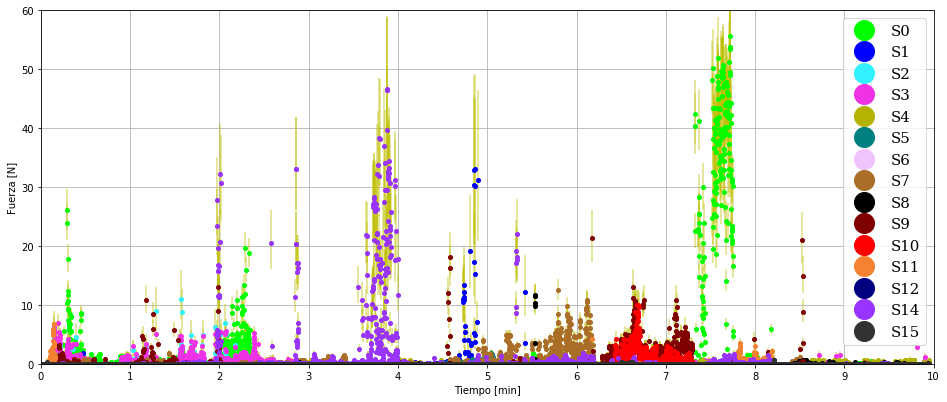

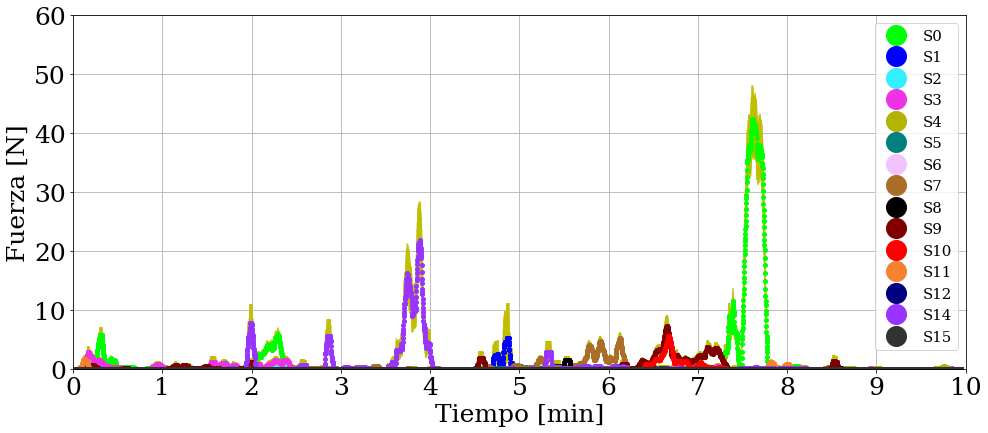

In [0]:

sensores16 = [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]

plt.figure(figsize=(16,6.5))
for j in sensores16:
  plt.vlines(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.xticks(np.arange(0,11))
plt.grid()  
plt.xlim(0,10)
plt.ylim(0, 60)
plt.savefig('serie_temporal_B16F.png')
plt.show()

plt.figure(figsize=(16,6.5))
for j in sensores16:
  plt.vlines(tiempo, err_sinf_filt[:,j], err_ssup_filt[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, s_filt[:,j],'.', markersize=8, color=color[j], label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.xticks(np.arange(0,11))
plt.grid()
plt.xlim(0,10)
plt.ylim(0,60)
plt.savefig('serie_temporal_B16F_mm.png') # "mm" = medias móviles
plt.show()


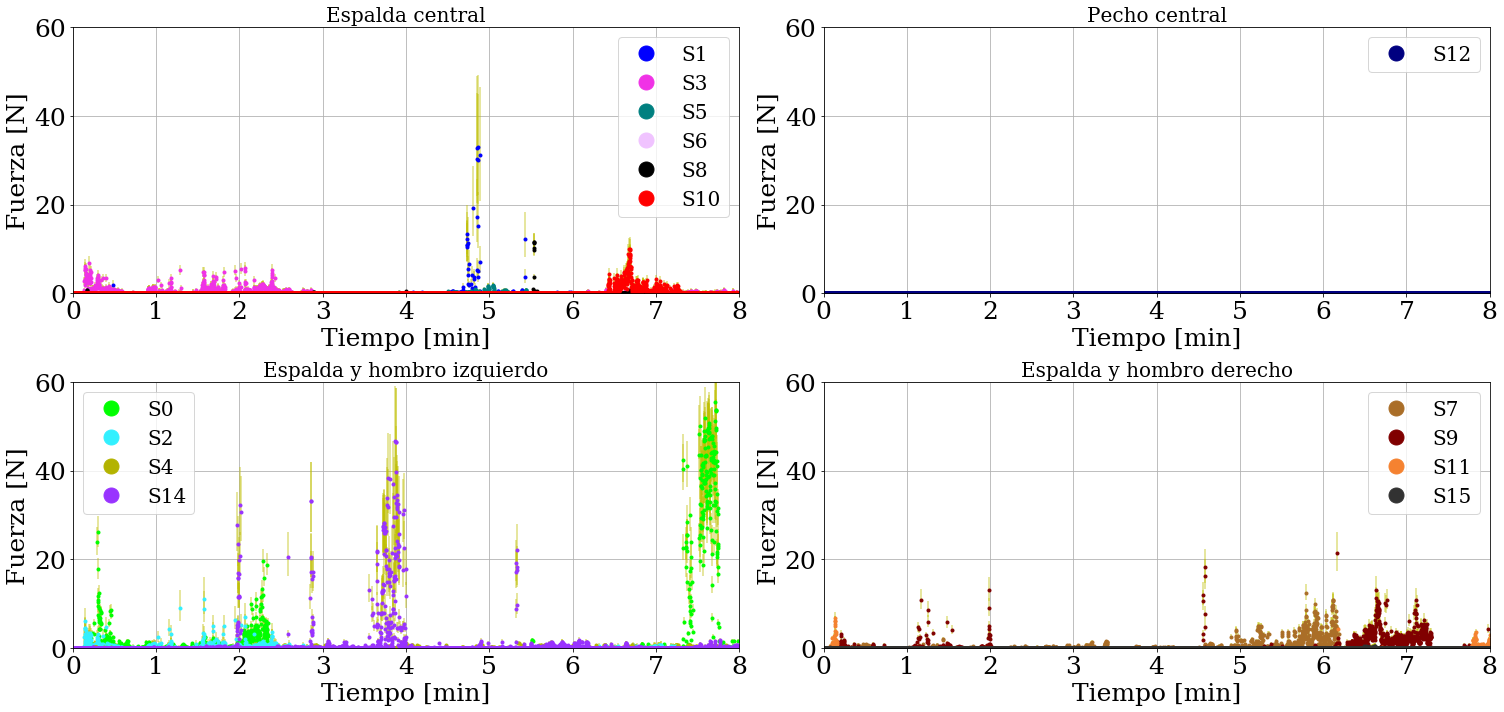

In [0]:
#Grafico la serie temporal por zonas del cuerpo

espalda_central = [1,3,5,6,8,10]
pecho_central = [12]
espalda_hombro_izq = [0,2,4,14] #tal vez acá viene el 15
espalda_hombro_der = [7,9,11,15] #tal vez acá viene el 14

xlim = [0,8]
ylim = [0,60]

plt.figure(figsize=(21,10))

plt.subplot(2,2,1)
for j in espalda_central: #[2]:#
  plt.vlines(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,2)
for j in pecho_central: #[2]:#
  plt.vlines(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Pecho central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,3)
for j in espalda_hombro_izq: #[2]:#
  plt.vlines(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,4)
for j in espalda_hombro_der: #[2]:#
  plt.vlines(tiempo, F_inf[:,j], F_sup[:,j], color='y', alpha=alpha)
  plt.plot(tiempo, F_medio[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro derecho',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig('serie_temporal_zonas_B16F.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


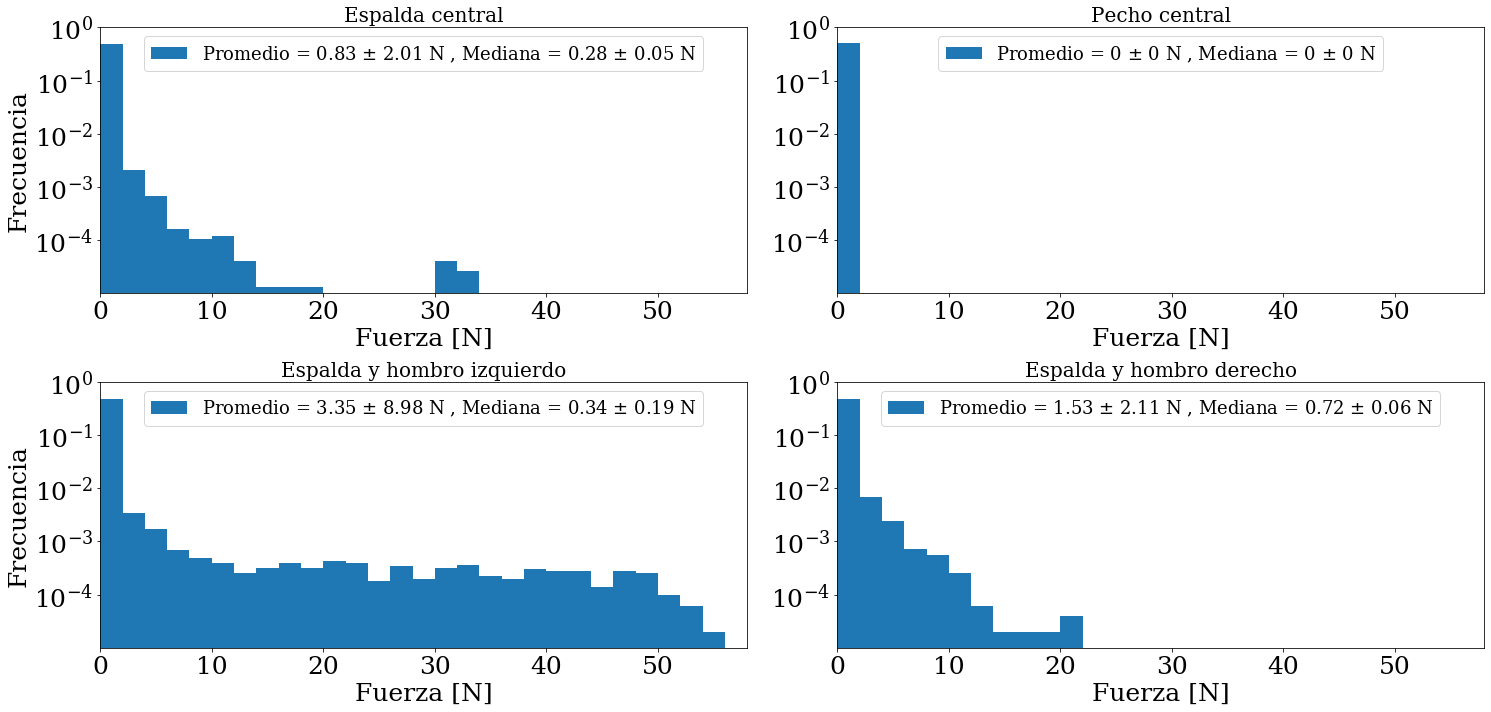

In [0]:
#Histogrameamos las fuerzas por zona en todo el viaje

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]

xlimd, xlimu = 0, 58
ylimd, ylimu= 0.00001, 1

for i in espalda_central:
  Fuerza1concat=np.concatenate([F_medio[:,i],Fuerza1concat])
for i in pecho_central:  
  Fuerza2concat=np.concatenate([F_medio[:,i],Fuerza2concat])
for i in espalda_hombro_izq: 
  Fuerza3concat=np.concatenate([F_medio[:,i],Fuerza3concat])
for i in espalda_hombro_der:  
  Fuerza4concat=np.concatenate([F_medio[:,i],Fuerza4concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat]
orde, anchobin = 2, 2
sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)
sigmaSe = np.sqrt(sum(sigS_j))
sigmaS2 = []
for i in range(4):
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0])
prom2, err2, mediana2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0])
prom3, err3, mediana3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0])
prom4, err4, mediana4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0])
errm1 = (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1
errm2 = (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2
errm3 = (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3
errm4 = (1.253/np.sqrt(len(Fuerza4concat[Fuerza4concat>0])))*err4

prom_2 = [prom1, 0, prom3, prom4]
err_2 = [err1, 0, err3, err4]
med_2 = [mediana1,0, mediana3, mediana4]
err_med2 = [errm1, 0, errm3, errm4]
label_zonas = ['Espalda central', 'Pecho central', 'Espalda y hombro izquierdo', 'Espalda y hombro derecho']

FT2 = []
plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=18)

for i in range(4):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,2,i+1)
  if i==0:
    plt.ylabel('Frecuencia')
  if i==2:
    plt.ylabel('Frecuencia')
  plt.hist(F_concat[i], bins=np.arange(0,31)*anchobin, density=True, label='Promedio = '+str(round(prom_2[i],orde))+r' $\pm$ '+str(round(err_2[i],orde))+' N , Mediana = '+str(round(med_2[i],orde))+r' $\pm$ '+str(round(err_med2[i],orde))+' N')
  plt.title(label_zonas[i], fontsize=20)#+r' - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  plt.legend(loc='upper center')
  plt.xlabel('Fuerza [N]')
  plt.yscale("log")
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)
  plt.yticks([0.0001,0.001,0.01,0.1,1])

plt.tight_layout()
plt.savefig('hist_zonas_B16.png')
plt.show()

In [0]:
#Script para guardarlos datos en un .txt
"""
tiempo=(UrqB16[:,0]-UrqB16[0,0])/60000
print(np.where(tiempo<50)[0][-1] )# & tiempo>35)
print(np.where(tiempo>33)[0][0])
tiempo_B = (UrqB16[20551:30795,0]-UrqB16[20551,0])/1000
sensores = UrqB16[20551:30795,1:]
datos=np.zeros((len(tiempo_B),17))
#estaticasF=np.zeros((12,19))

#print(estaticasV)
datos=np.zeros((len(tiempo_11),17))
datos[:,0]= tiempo_11
for i in range(16):
  datos[:,i+1] = F_medio_11[:,i]
np.savetxt('fuerzas_sarmiento.txt', datos)
#errorV = np.zeros((12,19))
"""

#Tiempos que ni idea
'''
tiempo[1262]
tiempo[3295]

tiempo[1262]
tiempo[4295]
tiempo[6114]
tiempo[5641]
'''

In [0]:
#Convertimos la lectura a fuerza para la medición en el subteB del 16/9
tiempo_11 = (Sarmiento11[1500:17000,0]-Sarmiento11[1500,0])/60000

#L, U = np.zeros((len(tiempo), 16)), np.zeros((len(tiempo), 16))
F_medio_11 = np.zeros((len(tiempo_11), 16))
F_inf_11 = np.zeros((len(tiempo_11), 16))
F_sup_11 = np.zeros((len(tiempo_11), 16))
inf_11 = np.zeros((len(tiempo_11), 16))
sup_11 = np.zeros((len(tiempo_11), 16))

for j in range(16):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo_11)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo_11)
  F_medio_11[:,j], F_inf_11[:,j], F_sup_11[:,j], inf_11[:,j], sup_11[:,j] = conversion(Sarmiento11[1500:17000,j+1], L, U, parametros[j])

# Hacemos un medias móviles

sensores11 = [1,2,3,4,5,6,7,8,10,11,12,15]
ventana = 20
s_filt_11 = np.zeros((len(tiempo_11),16))
err_sinf_filt_11 = np.zeros((len(tiempo_11),16))
err_ssup_filt_11= np.zeros((len(tiempo_11),16))

for j in range(16):
  s_filt_11[:,j], err_sinf_filt_11[:,j], err_ssup_filt_11[:,j] = sliding_mean(F_medio_11[:,j], ventana, inf_11[:,j], sup_11[:,j])

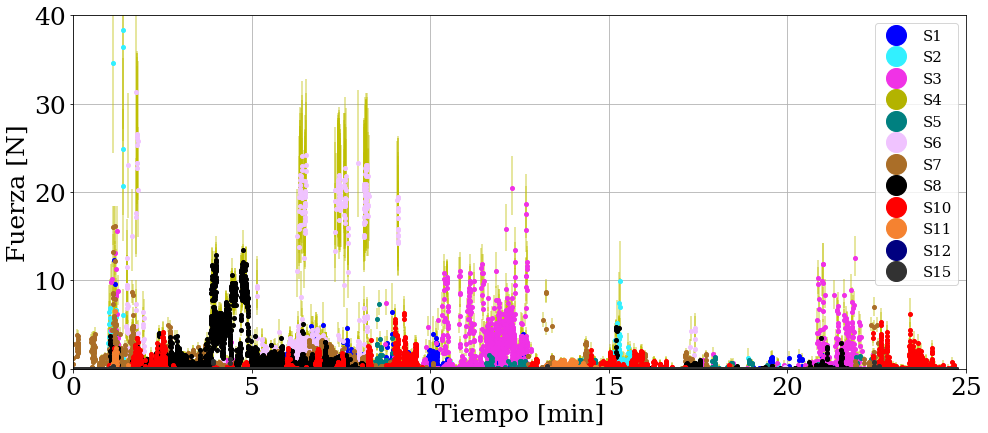

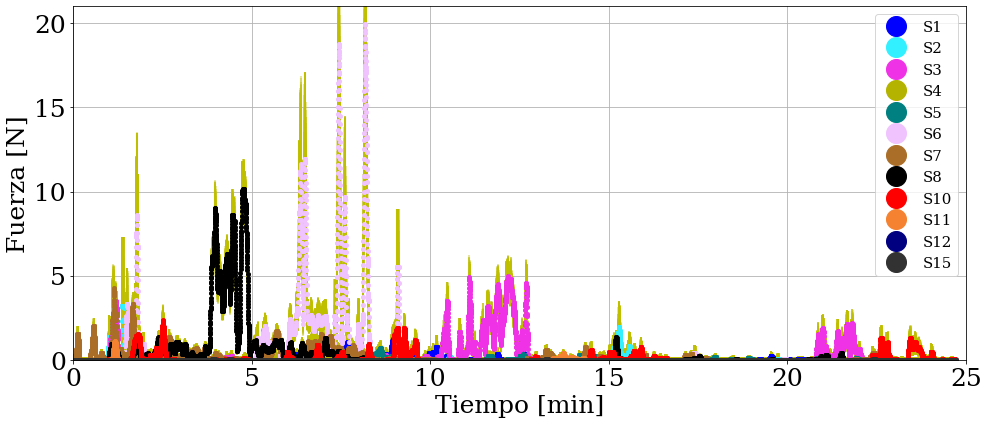

In [0]:
plt.figure(figsize=(16,6.5))
for j in sensores11:
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()  
#plt.xticks(np.arange(0,11))
plt.xlim(0,25)
plt.ylim(0, 40)
plt.savefig('serie_temporal_S11F.png')
plt.show()

plt.figure(figsize=(16,6.5))
for j in sensores11:
  plt.vlines(tiempo_11, err_sinf_filt_11[:,j], err_ssup_filt_11[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_11, s_filt_11[:,j],'.', markersize=8, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
#plt.xticks(np.arange(0,11))
plt.xlim(0,25)
plt.ylim(0,21)
plt.savefig('serie_temporal_S11F_mm.png') # "mm" = medias móviles
plt.show()

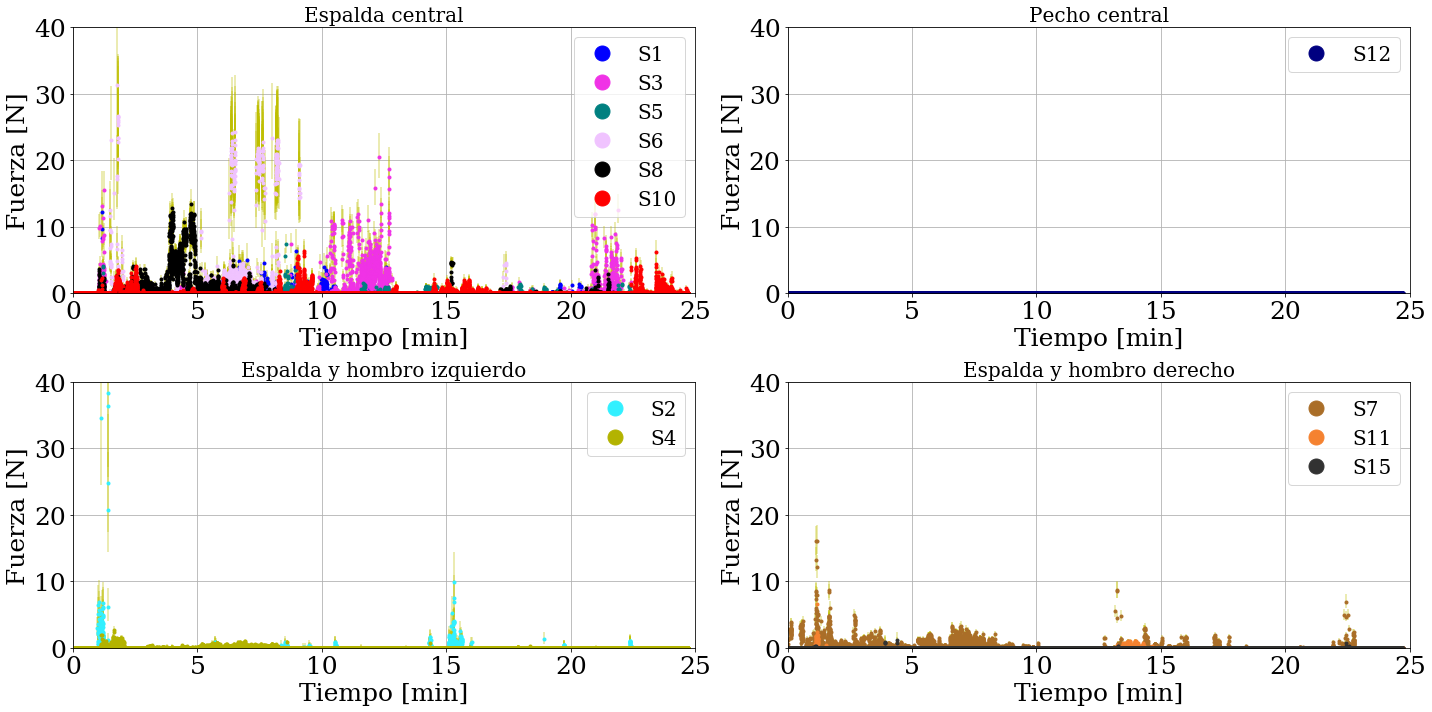

In [0]:
#Grafico la serie temporal por zonas del cuerpo

espalda_central = [1,3,5,6,8,10]
pecho_central = [12]
espalda_hombro_izq = [2,4] 
espalda_hombro_der = [7,11,15] 

xlim = [0,25]
ylim = [0,40]

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
for j in espalda_central: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper left', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,2)
for j in pecho_central: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Pecho central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,3)
for j in espalda_hombro_izq: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,4)
for j in espalda_hombro_der: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro derecho',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig('serie_temporal_zonas_S11F.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


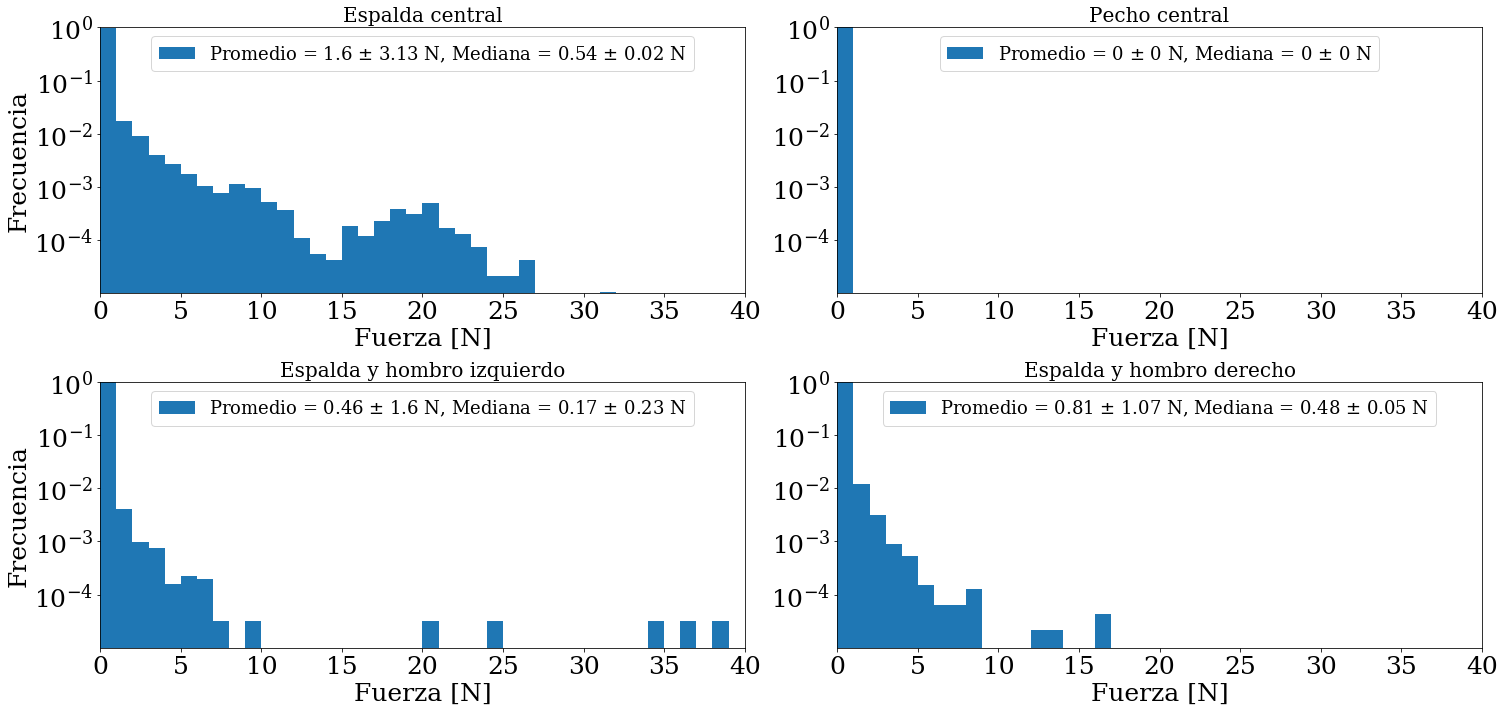

In [0]:
#Histogrameamos las fuerzas por zona en todo el viaje

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]

xlimd, xlimu = 0, 40
ylimd, ylimu= 0.00001, 1

for i in espalda_central:
  Fuerza1concat=np.concatenate([F_medio_11[:,i],Fuerza1concat])
for i in pecho_central:  
  Fuerza2concat=np.concatenate([F_medio_11[:,i],Fuerza2concat])
for i in espalda_hombro_izq: 
  Fuerza3concat=np.concatenate([F_medio_11[:,i],Fuerza3concat])
for i in espalda_hombro_der:  
  Fuerza4concat=np.concatenate([F_medio_11[:,i],Fuerza4concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat]

orde, anchobin = 2, 1
sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)
sigmaSe = np.sqrt(sum(sigS_j))
sigmaS2 = []
for i in range(4):
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1, errm1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0]), (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1
prom2, err2, mediana2, errm2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0]), (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2
prom3, err3, mediana3, errm3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0]), (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3
prom4, err4, mediana4, errm4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0]), (1.253/np.sqrt(len(Fuerza4concat[Fuerza4concat>0])))*err4
prom_2 = [prom1, 0, prom3, prom4]
err_2 = [err1, 0, err3, err4]
med_2 = [mediana1, 0, mediana3, mediana4]
err_med2 = [errm1, 0, errm3, errm4]
label_zonas = ['Espalda central', 'Pecho central', 'Espalda y hombro izquierdo', 'Espalda y hombro derecho']

FT2 = []
plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=18)

for i in range(4):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,2,i+1)
  if i==0:
    plt.ylabel('Frecuencia')
  if i==2:
    plt.ylabel('Frecuencia')
  plt.hist(F_concat[i], bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom_2[i],orde))+r' $\pm$ '+str(round(err_2[i],orde))+' N, Mediana = '+str(round(med_2[i],orde))+r' $\pm$ '+str(round(err_med2[i],orde))+' N')
  plt.title(label_zonas[i], fontsize=20)#+r' - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  plt.legend(loc='upper center')
  plt.xlabel('Fuerza [N]')
  plt.yscale("log")
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)
  plt.yticks([0.0001,0.001,0.01,0.1,1])
plt.tight_layout()
plt.savefig('hist_zonas_S11.png')
plt.show()

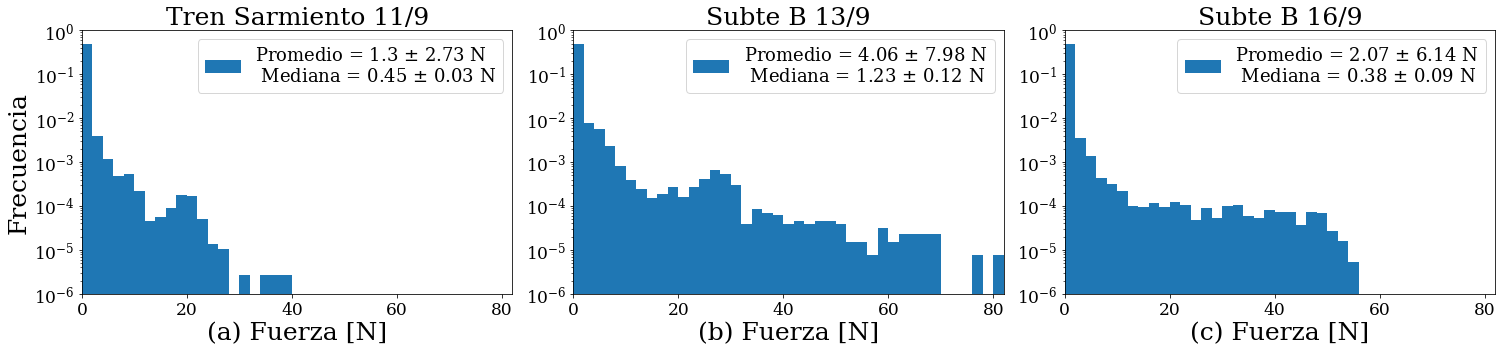

In [0]:
#Histogrameamos las fuerzas en todo el viaje
Fuerza1concat11, Fuerza1concat16, Fuerza1concat13 = [], [], []
xlimd, xlimu = 0, 82
ylimd, ylimu= 0.000001, 1

for i in sensores11:#range(15):
  Fuerza1concat11=np.concatenate([F_medio_11[:,i],Fuerza1concat11])
for i in sensores13:#range(15):
  Fuerza1concat13=np.concatenate([F_medio_13[:,i],Fuerza1concat13])
for i in sensores16:#range(15):
  Fuerza1concat16=np.concatenate([F_medio[:,i],Fuerza1concat16])

prom1_11, err1_11, mediana1_11 = np.mean(Fuerza1concat11[Fuerza1concat11>0]), np.std(Fuerza1concat11[Fuerza1concat11>0]), np.median(Fuerza1concat11[Fuerza1concat11>0])
prom1_13, err1_13, mediana1_13 = np.mean(Fuerza1concat13[Fuerza1concat13>0]), np.std(Fuerza1concat13[Fuerza1concat13>0]), np.median(Fuerza1concat13[Fuerza1concat13>0])
prom1_16, err1_16, mediana1_16 = np.mean(Fuerza1concat16[Fuerza1concat16>0]), np.std(Fuerza1concat16[Fuerza1concat16>0]), np.median(Fuerza1concat16[Fuerza1concat16>0])
errm1_11 = (1.253/np.sqrt(len(Fuerza1concat11[Fuerza1concat11>0])))*err1_11
errm1_13 = (1.253/np.sqrt(len(Fuerza1concat13[Fuerza1concat13>0])))*err1_13
errm1_16 = (1.253/np.sqrt(len(Fuerza1concat16[Fuerza1concat16>0])))*err1_16

orde, anchobin = 2, 2

plt.figure(figsize=(21,5))
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.rc('legend',fontsize=18)

plt.subplot(1,3,1)
plt.hist(Fuerza1concat11, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_11,orde))+r' $\pm$ '+str(round(err1_11,orde))+' N \n Mediana = '+str(round(mediana1_11,orde))+r' $\pm$ '+str(round(errm1_11,orde))+' N')
plt.title(r'Tren Sarmiento 11/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
plt.ylabel('Frecuencia')
plt.xlabel('(a) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.subplot(1,3,2)
plt.hist(Fuerza1concat13, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_13,orde))+r' $\pm$ '+str(round(err1_13,orde))+' N \n Mediana = '+str(round(mediana1_13,orde))+r' $\pm$ '+str(round(errm1_13,orde))+' N')
plt.title(r'Subte B 13/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
#plt.ylabel('Frecuencia')
plt.xlabel('(b) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.subplot(1,3,3)
plt.hist(Fuerza1concat16, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_16,orde))+r' $\pm$ '+str(round(err1_16,orde))+' N \n Mediana = '+str(round(mediana1_16,orde))+r' $\pm$ '+str(round(errm1_16,orde))+' N')
plt.title(r'Subte B 16/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
#plt.ylabel('Frecuencia')
plt.xlabel('(c) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.tight_layout()
plt.savefig('histS_11-13-16_09.png')
plt.show()

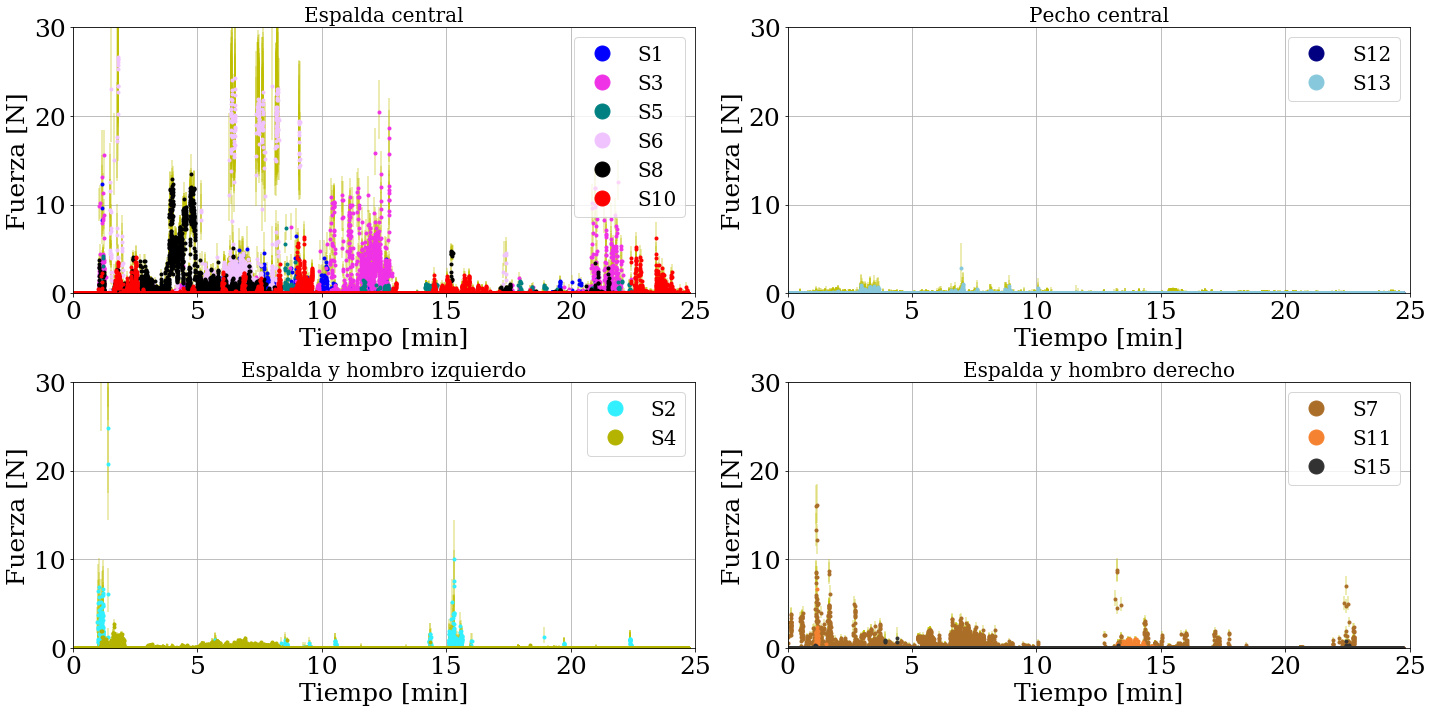

In [0]:
"""
#Grafico la serie temporal por zonas del cuerpo

espalda_central = [1,3,5,6,8,10]
pecho_central = [12]
espalda_hombro_izq = [2,4] 
espalda_hombro_der = [7,11,15] 

xlim = [0,25]
ylim = [0,30]

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
for j in espalda_central: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper left', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,2)
for j in pecho_central: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Pecho central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,3)
for j in espalda_hombro_izq: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,4)
for j in espalda_hombro_der: #[2]:#
  plt.vlines(tiempo_11, F_inf_11[:,j], F_sup_11[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_11, F_medio_11[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro derecho',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig('serie_temporal_zonas_S11F.png')
plt.show()
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


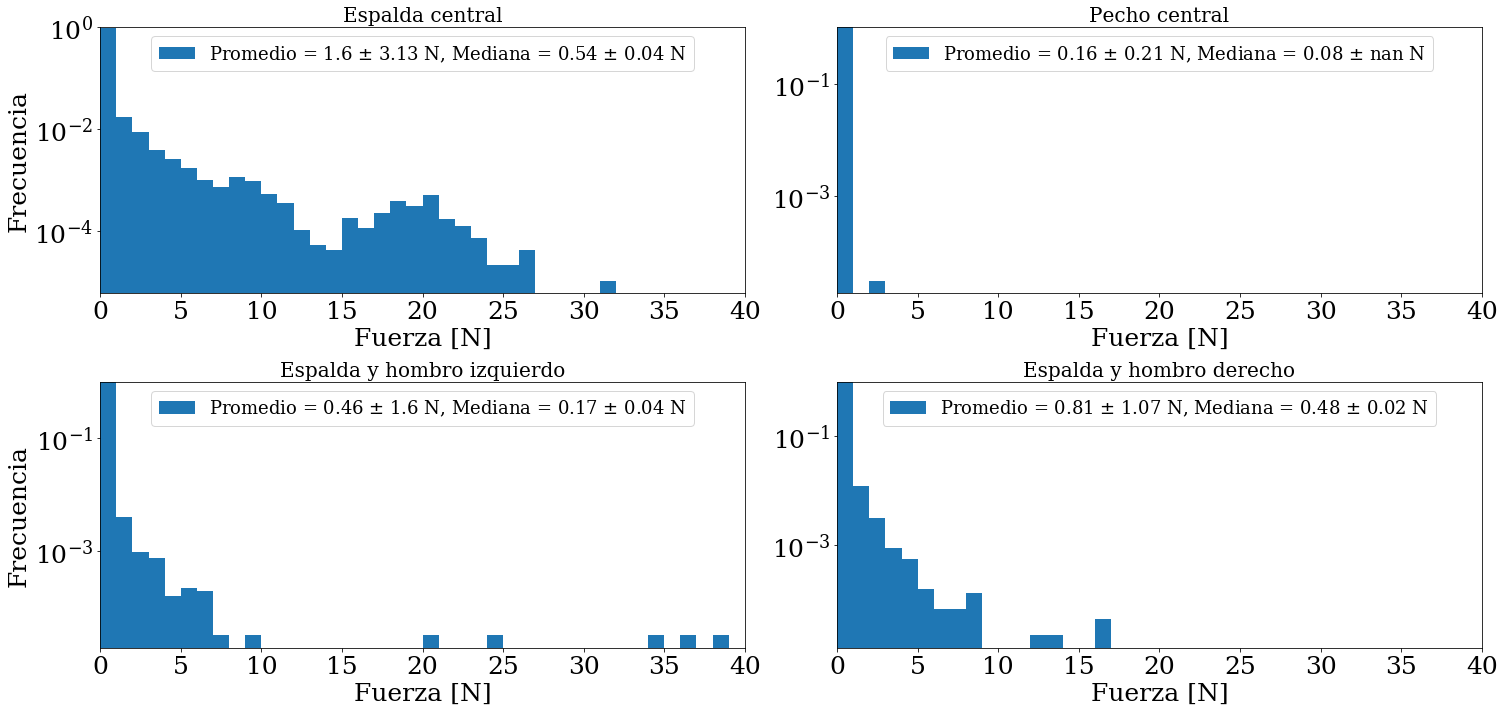

In [0]:
#Histogrameamos las fuerzas por zona en todo el viaje

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]

xlimd, xlimu = 0, 40
ylimd, ylimu= 0, 1

for i in espalda_central:
  Fuerza1concat=np.concatenate([F_medio_11[:,i],Fuerza1concat])
for i in pecho_central:  
  Fuerza2concat=np.concatenate([F_medio_11[:,i],Fuerza2concat])
for i in espalda_hombro_izq: 
  Fuerza3concat=np.concatenate([F_medio_11[:,i],Fuerza3concat])
for i in espalda_hombro_der:  
  Fuerza4concat=np.concatenate([F_medio_11[:,i],Fuerza4concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat]

orde, anchobin = 2, 1
sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)
sigmaSe = np.sqrt(sum(sigS_j))
sigmaS2 = []
for i in range(4):
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1, errm1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0]), (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1
prom2, err2, mediana2, errm2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0]), (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2
prom3, err3, mediana3, errm3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0]), (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3
prom4, err4, mediana4, errm4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0]), (1.253/np.sqrt(len(Fuerza4concat[Fuerza4concat>0])))*err4
prom_2 = [prom1, prom2, prom3, prom4]
err_2 = [err1, err2, err3, err4]
med_2 = [mediana1, mediana2, mediana3, mediana4]
err_med2 = [errm1, errm2, errm3, errm4]
label_zonas = ['Espalda central', 'Pecho central', 'Espalda y hombro izquierdo', 'Espalda y hombro derecho']

FT2 = []
plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=18)

for i in range(4):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,2,i+1)
  if i==0:
    plt.ylabel('Frecuencia')
  if i==2:
    plt.ylabel('Frecuencia')
  plt.hist(F_concat[i], bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom_2[i],orde))+r' $\pm$ '+str(round(err_2[i],orde))+' N, Mediana = '+str(round(med_2[i],orde))+r' $\pm$ '+str(round(err_med2[i],orde))+' N')
  plt.title(label_zonas[i], fontsize=20)#+r' - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  plt.legend(loc='upper center')
  plt.xlabel('Fuerza [N]')
  plt.yscale("log")
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)

plt.tight_layout()
plt.savefig('hist_zonas_S11.png')
plt.show()

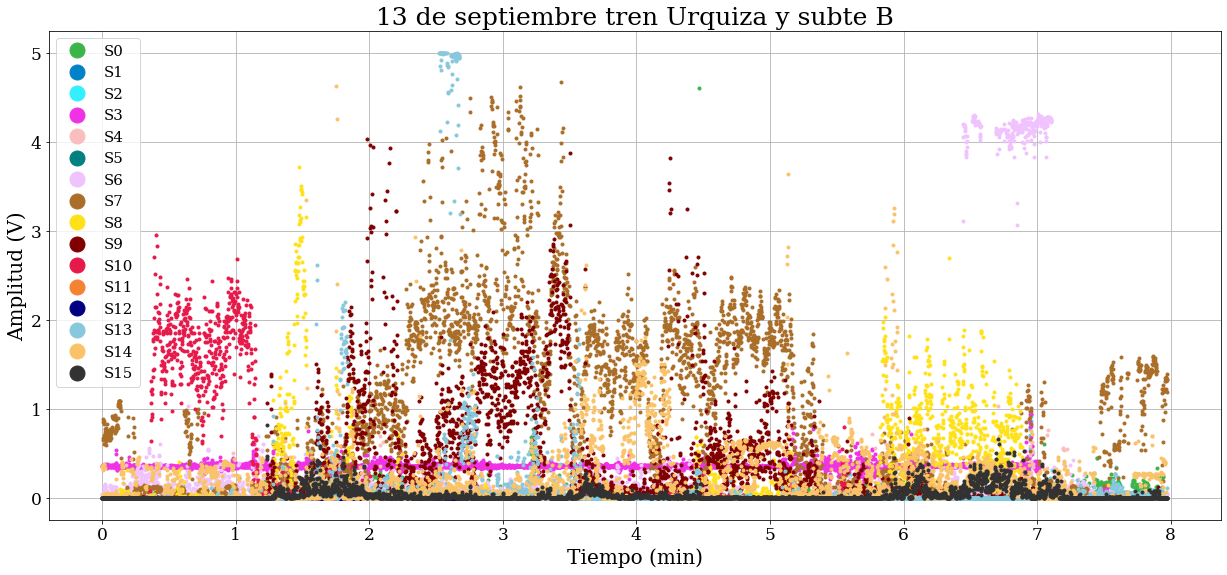

In [0]:
ini, fin = 27000, 32000

plt.figure(figsize=(21,9))
for i in range(16):
  plt.plot((UrqB13[ini:fin,0]-UrqB13[ini,0])/60000, UrqB13[ini:fin,i+1]*5/1023,'.', color=color[i],label='S'+str(i))
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)', fontsize=20)
  plt.ylabel('Amplitud (V)', fontsize=20)
  plt.title('13 de septiembre tren Urquiza y subte B', fontsize=25)
plt.legend(fontsize=15, markerscale=5)
plt.grid()

In [0]:
#Convertimos la lectura a fuerza para la medición en el subteB del 13/9

ini, fin = 27000, 32000
tiempo_13 = (UrqB13[ini:fin,0]-UrqB13[ini,0])/60000
subteB13 = np.zeros((len(tiempo_13), 17))
for j in range (16):
  subteB13[:,j+1] = UrqB13[ini:fin,j+1]

F_medio_13 = np.zeros((len(tiempo_13), 16))
F_inf_13 = np.zeros((len(tiempo_13), 16))
F_sup_13 = np.zeros((len(tiempo_13), 16))
inf_13 = np.zeros((len(tiempo_13), 16))
sup_13 = np.zeros((len(tiempo_13), 16))

for j in range(16):
  L, U = prediccion(parametros[j], sigma_sensores[j], tiempo_13)
  #L[:,j], U[:,j] = prediccion(parametros[j], sigma_sensores[j], tiempo)
  F_medio_13[:,j], F_inf_13[:,j], F_sup_13[:,j], inf_13[:,j], sup_13[:,j] = conversion(subteB13[:,j+1], L, U, parametros[j])


ventana = 20
n_sensores = 16
s_filt_13 = np.zeros((len(tiempo_13),n_sensores))
err_sinf_filt_13 = np.zeros((len(tiempo_13),n_sensores))
err_ssup_filt_13 = np.zeros((len(tiempo_13),n_sensores))

for j in range(n_sensores):
  s_filt_13[:,j], err_sinf_filt_13[:,j], err_ssup_filt_13[:,j] = sliding_mean(F_medio_13[:,j], ventana, inf_13[:,j], sup_13[:,j])

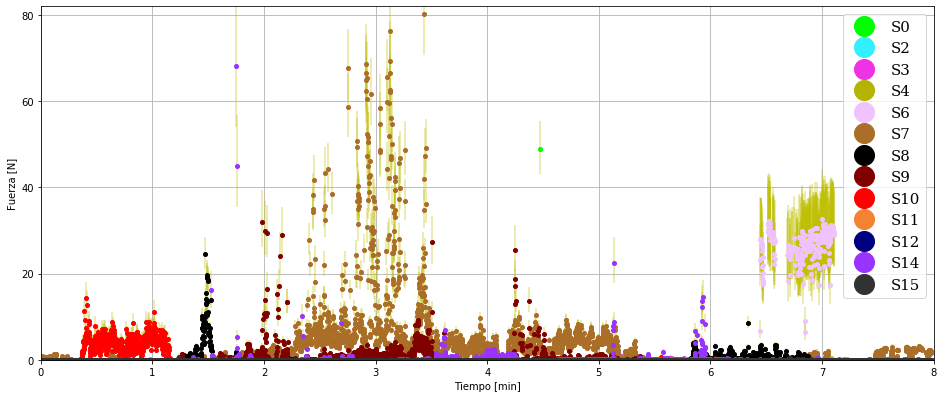

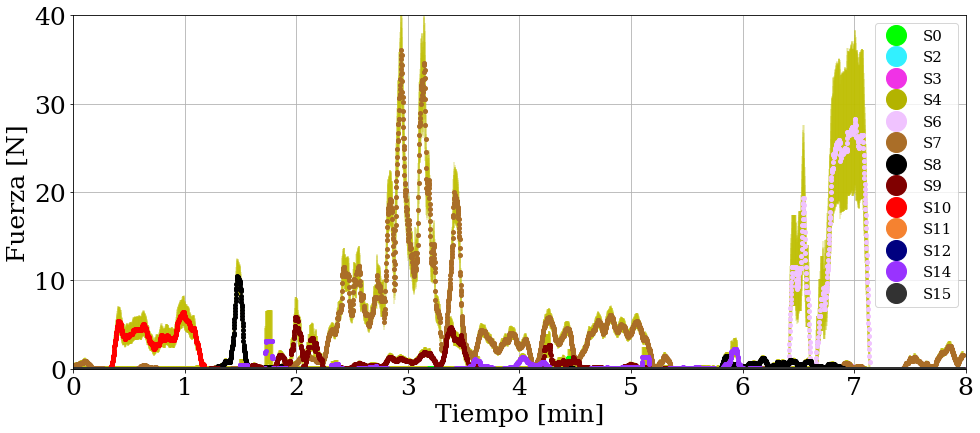

In [7]:
sensores13 = [0,2,3,4,6,7,8,9,10,11,12,14,15]

plt.figure(figsize=(16,6.5))
for j in sensores13:
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()  
#plt.xticks(np.arange(0,8))
plt.xlim(0,8)
plt.ylim(0, 82)
plt.savefig('serie_temporal_B13F.png')
plt.show()

plt.figure(figsize=(16,6.5))
for j in sensores13:
  plt.vlines(tiempo_13, err_sinf_filt_13[:,j], err_ssup_filt_13[:,j], color='y', alpha=0.3)
  plt.plot(tiempo_13, s_filt_13[:,j],'.', markersize=8, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()
#plt.xticks(np.arange(0,8))
plt.xlim(0,8)
plt.ylim(0,40)
plt.savefig('serie_temporal_B13F_mm.png') # "mm" = medias móviles
plt.show()

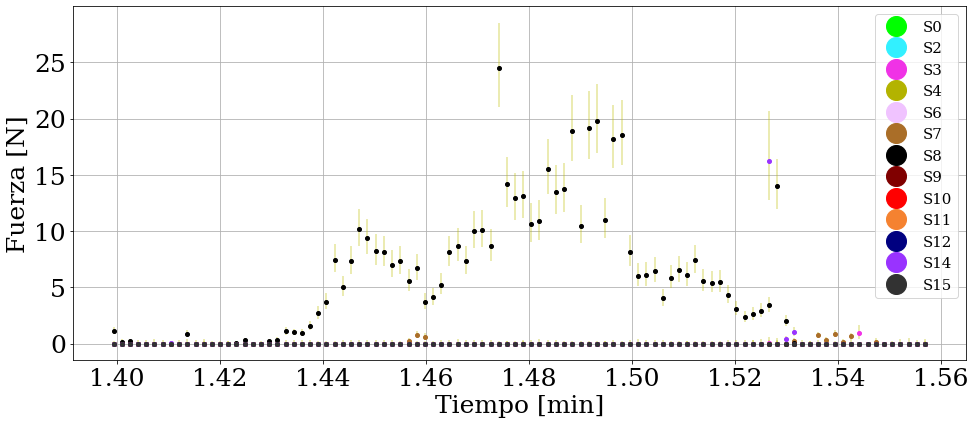

In [9]:
i , f = 880,980
plt.figure(figsize=(16,6.5))
for j in sensores13:
  plt.vlines(tiempo_13[i:f], F_inf_13[i:f,j], F_sup_13[i:f,j], color='y', alpha=0.4)
  plt.plot(tiempo_13[i:f], F_medio_13[i:f,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()  
#plt.xticks(np.arange(0,8))
#plt.xlim(0,8)
#plt.ylim(0, 82)
#plt.savefig('serie_temporal_B13F.png')
plt.show()

In [0]:
len(tiempo_13)

5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


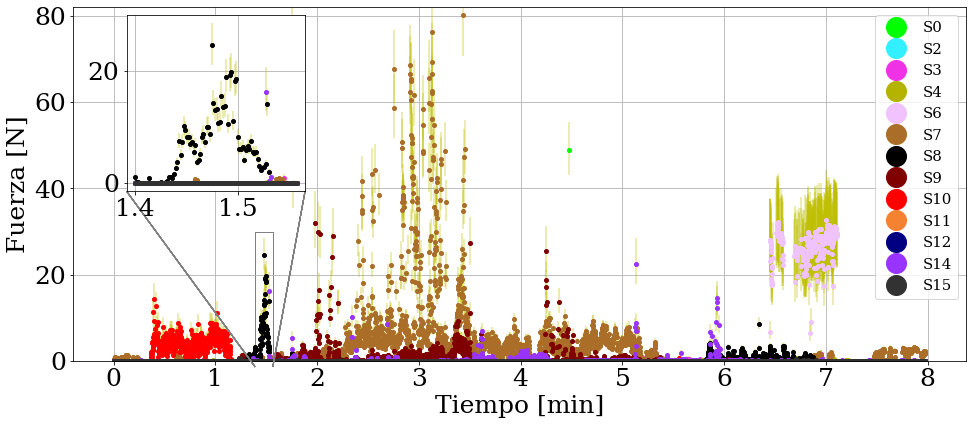

In [10]:
"""
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()  
#plt.xticks(np.arange(0,8))
plt.xlim(0,8)
plt.ylim(0, 82)
plt.savefig('serie_temporal_B13F.png')
plt.show()
"""
i , f = 880 , 980
#plt.figure(figsize=(16,6.5))

fig, ax1 = plt.subplots(figsize=(16,6.5))
for j in sensores13:
  #T_E = np.arange(1,max(T)+1,1)
# The data.
  ax1.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=0.4)
  ax1.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  ax1.set_xlabel('Tiempo [min]')
  ax1.set_ylabel('Fuerza [N]')
  ax1.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.grid()

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
  ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
  ip = InsetPosition(ax1, [0.06,0.48,0.2,0.5])
  ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
  mark_inset(ax1, ax2, loc1=4, loc2=3, fc="none", ec='0.5')

# The data: only display for low temperature in the inset figure.
  #Tmax = max(T_D)
  ax2.vlines(tiempo_13[i:f], F_inf_13[i:f,j], F_sup_13[i:f,j], color='y', alpha=0.4)
  ax2.plot(tiempo_13[i:f], F_medio_13[i:f,j],'.', color=color[j], markersize=8, label='S'+str(j))
# The Einstein fit (not very good at low T).
#ax2.plot(T_E[T_E<=Tmax], CV_E[T_E<=Tmax], c='m', lw=2, alpha=0.5, label='Einstein model')
# The Debye fit.
  #ax2.plot(T_D, CV_D, c='r', lw=2, alpha=0.5, label='Debye model')
  #ax2.legend(loc=0)

# Some ad hoc tweaks.
ax1.set_ylim(0,82)
#ax2.set_yticks(np.arange(0,2,0.4))
#ax2.set_xticklabels(ax2.get_xticks(), backgroundcolor='w')
#ax2.tick_params(axis='x', which='major', pad=8)
plt.grid()
plt.savefig('serie_temporal_B13Finset.png')
plt.show()

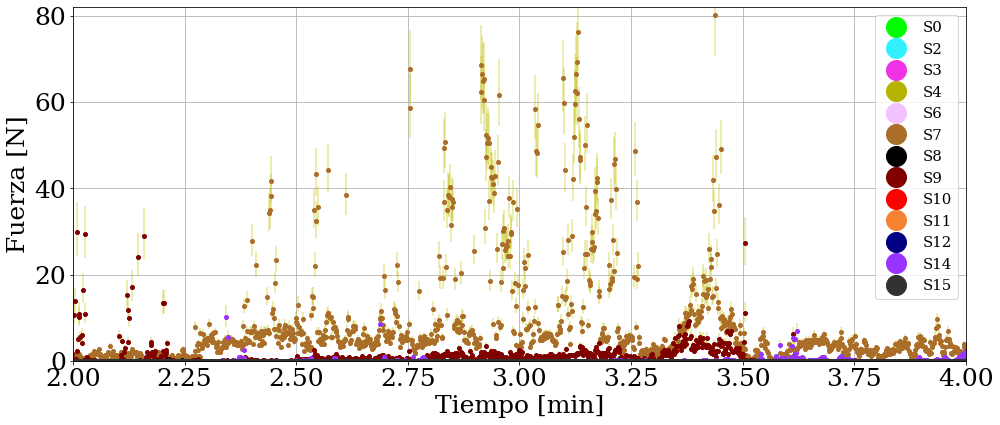

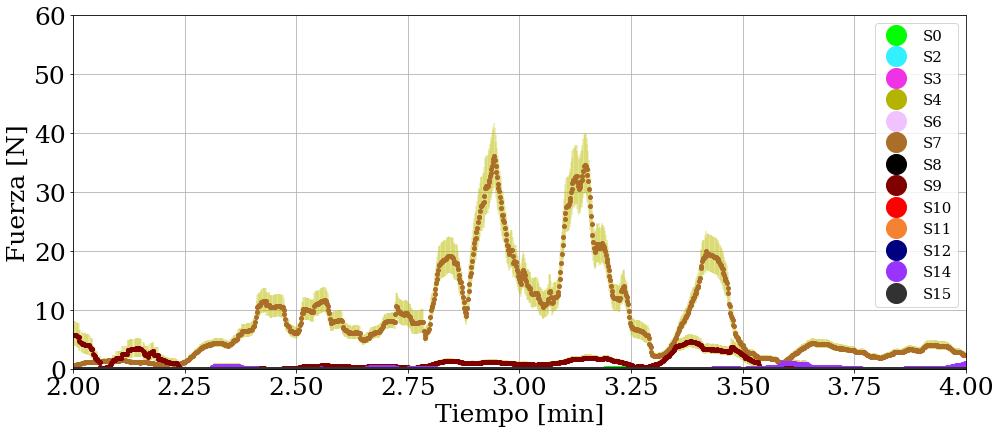

In [0]:
#sensores13 = [0,2,3,4,6,7,8,9,10,11,12,13,14,15]

plt.figure(figsize=(16,6.5))
for j in sensores13:
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()  
#plt.xticks(np.arange(0,8))
plt.xlim(2,4)
plt.ylim(0, 82)
plt.savefig('serie_temporal_B13F_zoom.png')
plt.show()

plt.figure(figsize=(16,6.5))
for j in sensores13:
  plt.vlines(tiempo_13, err_sinf_filt_13[:,j], err_ssup_filt_13[:,j], color='y', alpha=0.3)
  plt.plot(tiempo_13, s_filt_13[:,j],'.', markersize=8, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
plt.grid()
#plt.xticks(np.arange(0,8))
plt.xlim(2,4)
plt.ylim(0,60)
plt.savefig('serie_temporal_B13F_mm_zoom.png') # "mm" = medias móviles
plt.show()

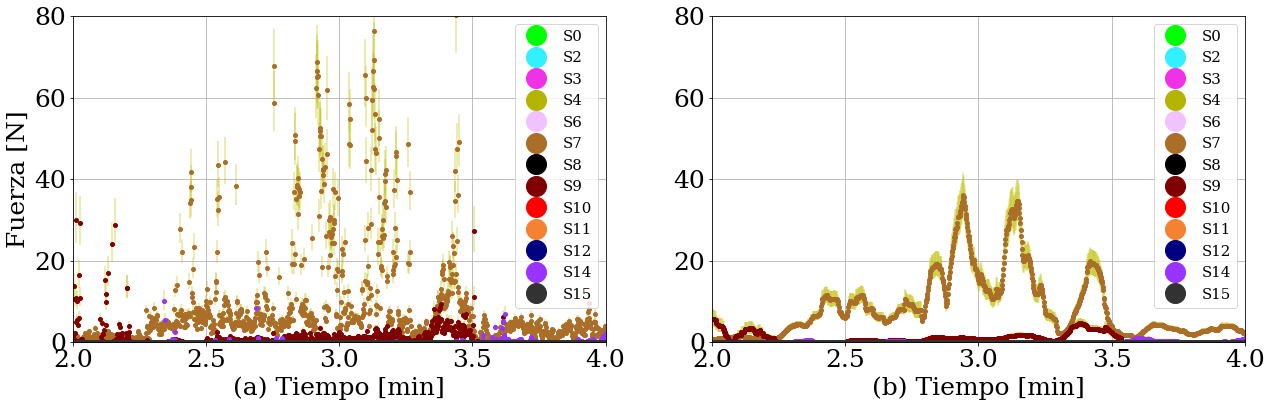

In [0]:
plt.figure(figsize=(21,6))
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.subplot(1,2,1)
for j in sensores13:
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=0.4)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=8, label='S'+str(j))
  plt.xlabel('(a) Tiempo [min]')
  plt.grid()
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.grid()
  plt.xlim(2,4)
  plt.ylim(0,80)
plt.grid()  
plt.subplot(1,2,2)
for j in sensores13:
  plt.vlines(tiempo_13, err_sinf_filt_13[:,j], err_ssup_filt_13[:,j], color='y', alpha=0.3)
  plt.plot(tiempo_13, s_filt_13[:,j],'.', markersize=8, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.xlabel('(b) Tiempo [min]')
  #plt.grid()
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.xlim(2,4)
  plt.ylim(0,80)
plt.grid() 
#plt.xticks(np.arange(0,8))
plt.savefig('serie_temporal_B13F_juntas_zoom.png') # "mm" = medias móviles
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


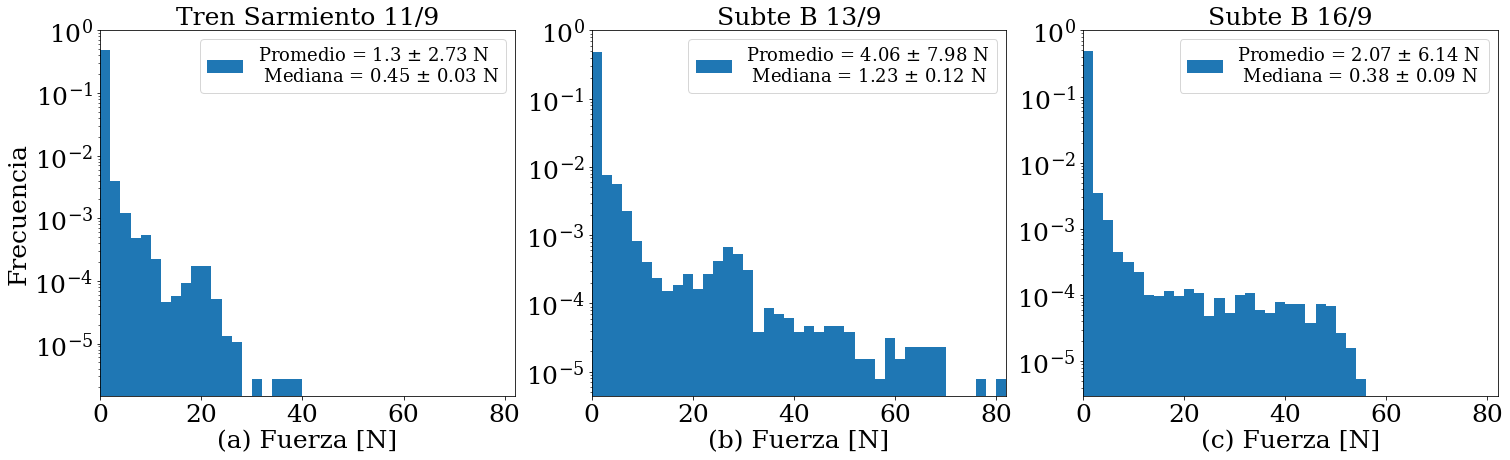

In [0]:
#Histogrameamos las fuerzas en todo el viaje
Fuerza1concat11, Fuerza1concat16, Fuerza1concat13 = [], [], []
xlimd, xlimu = 0, 82
ylimd, ylimu= 0, 1

for i in sensores11:#range(15):
  Fuerza1concat11=np.concatenate([F_medio_11[:,i],Fuerza1concat11])
for i in sensores13:#range(15):
  Fuerza1concat13=np.concatenate([F_medio_13[:,i],Fuerza1concat13])
for i in sensores16:#range(15):
  Fuerza1concat16=np.concatenate([F_medio[:,i],Fuerza1concat16])

prom1_11, err1_11, mediana1_11 = np.mean(Fuerza1concat11[Fuerza1concat11>0]), np.std(Fuerza1concat11[Fuerza1concat11>0]), np.median(Fuerza1concat11[Fuerza1concat11>0])
prom1_13, err1_13, mediana1_13 = np.mean(Fuerza1concat13[Fuerza1concat13>0]), np.std(Fuerza1concat13[Fuerza1concat13>0]), np.median(Fuerza1concat13[Fuerza1concat13>0])
prom1_16, err1_16, mediana1_16 = np.mean(Fuerza1concat16[Fuerza1concat16>0]), np.std(Fuerza1concat16[Fuerza1concat16>0]), np.median(Fuerza1concat16[Fuerza1concat16>0])
errm1_11 = (1.253/np.sqrt(len(Fuerza1concat11[Fuerza1concat11>0])))*err1_11
errm1_13 = (1.253/np.sqrt(len(Fuerza1concat13[Fuerza1concat13>0])))*err1_13
errm1_16 = (1.253/np.sqrt(len(Fuerza1concat16[Fuerza1concat16>0])))*err1_16

orde, anchobin = 2, 2

plt.figure(figsize=(21,6.5))
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=18)

plt.subplot(1,3,1)
plt.hist(Fuerza1concat11, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_11,orde))+r' $\pm$ '+str(round(err1_11,orde))+' N \n Mediana = '+str(round(mediana1_11,orde))+r' $\pm$ '+str(round(errm1_11,orde))+' N')
plt.title(r'Tren Sarmiento 11/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
plt.ylabel('Frecuencia')
plt.xlabel('(a) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.subplot(1,3,2)
plt.hist(Fuerza1concat13, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_13,orde))+r' $\pm$ '+str(round(err1_13,orde))+' N \n Mediana = '+str(round(mediana1_13,orde))+r' $\pm$ '+str(round(errm1_13,orde))+' N')
plt.title(r'Subte B 13/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
#plt.ylabel('Frecuencia')
plt.xlabel('(b) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.subplot(1,3,3)
plt.hist(Fuerza1concat16, bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom1_16,orde))+r' $\pm$ '+str(round(err1_16,orde))+' N \n Mediana = '+str(round(mediana1_16,orde))+r' $\pm$ '+str(round(errm1_16,orde))+' N')
plt.title(r'Subte B 16/9', fontsize=25)#, F$_T$ = '+str(int(FT))+r' $\pm$ '+str(int(sigmaS))+' N', fontsize=18)
plt.legend(loc='upper right')
plt.yscale("log")
#plt.ylabel('Frecuencia')
plt.xlabel('(c) Fuerza [N]')
plt.xlim(xlimd, xlimu)
plt.ylim(ylimd, ylimu)

plt.tight_layout()
plt.savefig('histS_11-13-16_09.png')
plt.show()

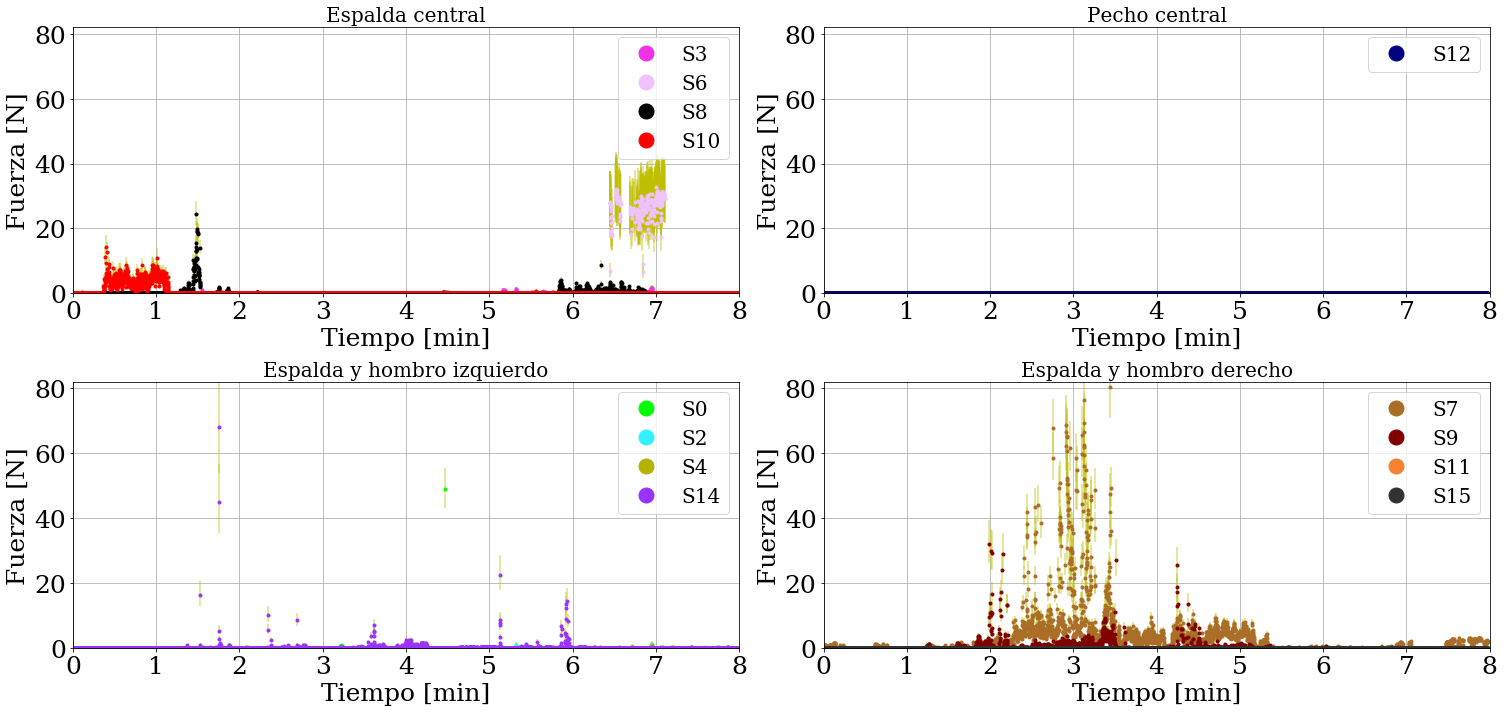

In [0]:
#Grafico la serie temporal por zonas del cuerpo

espalda_central = [3,6,8,10]
pecho_central = [12]
espalda_hombro_izq = [0,2,4,14] #tal vez acá viene el 15
espalda_hombro_der = [7,9,11,15] #tal vez acá viene el 14

xlim = [0,8]
ylim = [0,82]

plt.figure(figsize=(21,10))

plt.subplot(2,2,1)
for j in espalda_central: #[2]:#
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,2)
for j in pecho_central: #[2]:#
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Pecho central',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,3)
for j in espalda_hombro_izq: #[2]:#
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro izquierdo',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(2,2,4)
for j in espalda_hombro_der: #[2]:#
  plt.vlines(tiempo_13, F_inf_13[:,j], F_sup_13[:,j], color='y', alpha=alpha)
  plt.plot(tiempo_13, F_medio_13[:,j],'.', color=color[j], markersize=6, label='S'+str(j))
  plt.xlabel('Tiempo [min]')
  plt.ylabel('Fuerza [N]')
  plt.legend(loc='upper right', fontsize=15, markerscale=5)
  plt.rc('font', **font)
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  plt.rc('legend',fontsize=18)
plt.grid()
plt.rc('font', **font)
plt.title('Espalda y hombro derecho',fontsize=20)
plt.legend(fontsize=20, markerscale=5)
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig('serie_temporal_zonas_B13F.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


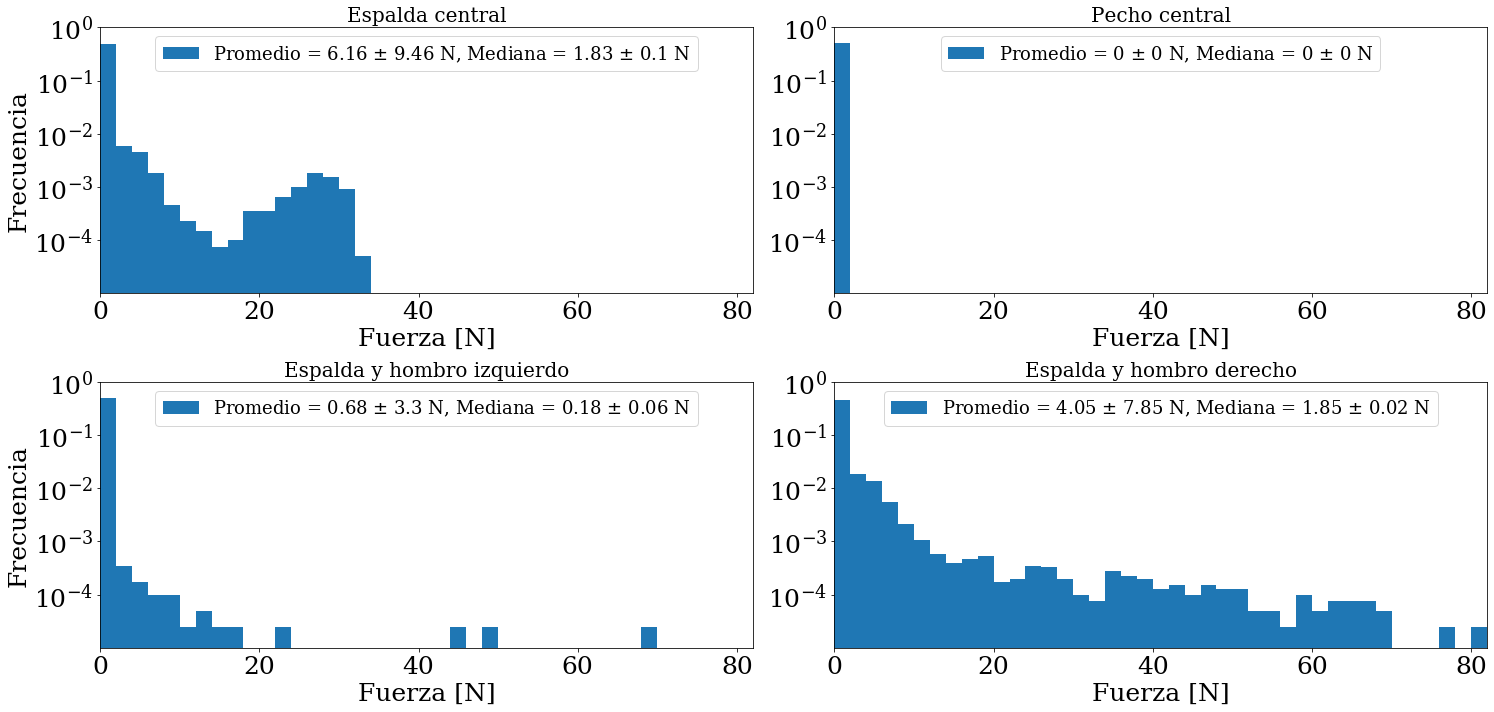

In [0]:
#Histogrameamos las fuerzas por zona en todo el viaje

Fuerza1concat=[]
Fuerza2concat=[]
Fuerza3concat=[]
Fuerza4concat=[]

xlimd, xlimu = 0, 82
ylimd, ylimu= 0.00001, 1

for i in espalda_central:
  Fuerza1concat=np.concatenate([F_medio_13[:,i],Fuerza1concat])
for i in pecho_central:  
  Fuerza2concat=np.concatenate([F_medio_13[:,i],Fuerza2concat])
for i in espalda_hombro_izq: 
  Fuerza3concat=np.concatenate([F_medio_13[:,i],Fuerza3concat])
for i in espalda_hombro_der:  
  Fuerza4concat=np.concatenate([F_medio_13[:,i],Fuerza4concat])

F_concat = [Fuerza1concat,Fuerza2concat,Fuerza3concat,Fuerza4concat]

orde, anchobin = 2, 2
sigS_j = []
for j in range(len(sigma_sensores)):
  sigS_j.append(inversa(sigma_sensores[j],parametros[j][0],parametros[j][1],parametros[j][2])**2)
sigmaSe = np.sqrt(sum(sigS_j))
sigmaS2 = []
for i in range(4):
  sigmaS2.append(sigmaSe*np.sqrt(len(F_concat[i][F_concat[i]>0])))

prom1, err1, mediana1, errm1 = np.mean(Fuerza1concat[Fuerza1concat>0]), np.std(Fuerza1concat[Fuerza1concat>0]), np.median(Fuerza1concat[Fuerza1concat>0]), (1.253/np.sqrt(len(Fuerza1concat[Fuerza1concat>0])))*err1
prom2, err2, mediana2, errm2 = np.mean(Fuerza2concat[Fuerza2concat>0]), np.std(Fuerza2concat[Fuerza2concat>0]), np.median(Fuerza2concat[Fuerza2concat>0]), (1.253/np.sqrt(len(Fuerza2concat[Fuerza2concat>0])))*err2
prom3, err3, mediana3, errm3 = np.mean(Fuerza3concat[Fuerza3concat>0]), np.std(Fuerza3concat[Fuerza3concat>0]), np.median(Fuerza3concat[Fuerza3concat>0]), (1.253/np.sqrt(len(Fuerza3concat[Fuerza3concat>0])))*err3
prom4, err4, mediana4, errm4 = np.mean(Fuerza4concat[Fuerza4concat>0]), np.std(Fuerza4concat[Fuerza4concat>0]), np.median(Fuerza4concat[Fuerza4concat>0]), (1.253/np.sqrt(len(Fuerza4concat[Fuerza4concat>0])))*err4
prom_2 = [prom1, 0, prom3, prom4]
err_2 = [err1, 0, err3, err4]
med_2 = [mediana1, 0, mediana3, mediana4]
err_med2 = [errm1, 0, errm3, errm4]
label_zonas = ['Espalda central', 'Pecho central', 'Espalda y hombro izquierdo', 'Espalda y hombro derecho']

FT2 = []
plt.figure(figsize=(21,10)) #Este tamaño se ve bien para el informe

#plt.title('Experimento controlado - Muri quieta - Convertido a Fuerza', fontsize=30)
plt.rc('font', **font)
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=18)

for i in range(4):
  FT = sum(F_concat[i])
  FT2.append(FT)
  plt.subplot(2,2,i+1)
  if i==0:
    plt.ylabel('Frecuencia')
  if i==2:
    plt.ylabel('Frecuencia')
  plt.hist(F_concat[i], bins=np.arange(0,42)*anchobin, density=True, label='Promedio = '+str(round(prom_2[i],orde))+r' $\pm$ '+str(round(err_2[i],orde))+' N, Mediana = '+str(round(med_2[i],orde))+r' $\pm$ '+str(round(err_med2[i],orde))+' N')
  plt.title(label_zonas[i], fontsize=20)#+r' - F$_T$='+str(int(FT))+r' $\pm$ '+str(int(sigmaS2[i]))+' N', fontsize=18)
  plt.legend(loc='upper center')
  plt.xlabel('Fuerza [N]')
  plt.yscale("log")
  plt.xlim(xlimd, xlimu)
  plt.ylim(ylimd, ylimu)
  plt.yticks([0.0001,0.001,0.01,0.1,1])
plt.tight_layout()
plt.savefig('hist_zonas_B13.png')
plt.show()

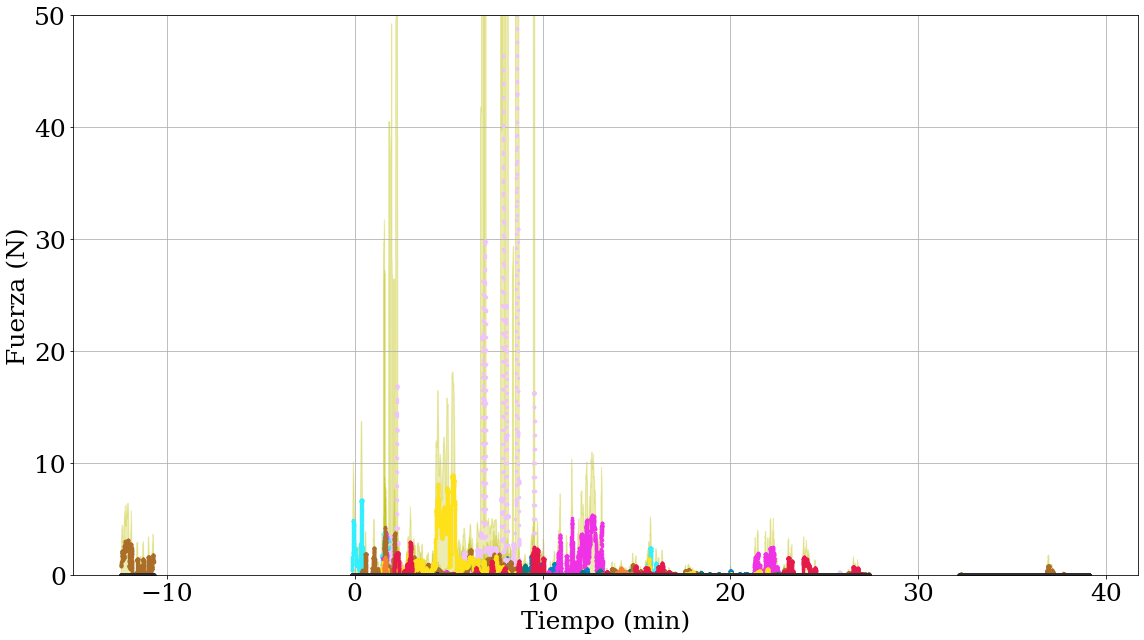

In [0]:
ini, fin = 5615, 6200
plt.figure(figsize=(16,9))
for j in [1,2,3,4,5,6,7,8,10,11,12,15]:
  #plt.errorbar(tiempo, F_medio[:,j], yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  #plt.fill_between(t_filt[:], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='purple', alpha=0.2)
  plt.fill_between(t_filt[:]-t_filt[1215], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='y', alpha=0.3)
  #plt.fill_between(t_filt, err_sinf_filt[:,j], err_ssup_filt[:,j], color='purple', alpha=0.2)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  #plt.plot(t_filt[:], s_filt[:,j],'.',label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.plot(t_filt[:]-t_filt[1215], s_filt[:,j],'.', markersize=5, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  #plt.legend(fontsize=15, markerscale=5)#loc='upper left')
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  #plt.yscale('log')
  #plt.semilogy()
  #plt.rc('legend',fontsize=20)
#plt.savefig('todos_crudo.png')
plt.grid()
#plt.xlim(0,14)
#plt.xlim(1.5,1.7)
#plt.ylim(0,4)
plt.ylim(0,50)
plt.tight_layout()
#plt.savefig('Sarmiento_prom_estirada.png')
#plt.savefig('Sarmiento_prom_?_zoom.png')
plt.show()


In [0]:
t_filt[2287]-t_filt[1215]
t_filt[2162]-t_filt[1215]
2287-2162

125

In [0]:
datos=np.zeros((len(t_filt[2162:2287]),17))
datos[:,0]= t_filt[2162:2287]
for i in range(16):
  datos[:,i+1] = s_filt[2162:2287,i]
datos[:,1]=np.zeros(len(t_filt[2162:2287]))
datos[:,10]=np.zeros(len(t_filt[2162:2287]))
np.savetxt('fuerzas_medias_sarmiento.txt', datos)


In [0]:
datos[:,10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [0]:
maximos = []

for j in range(16):
  maximos.append(max(s_filt[:,j]))

print(maximos)
#np.where(s_filt[:,6]==maximos[6], s_filt[:,6])
Sr = 8
indice = list(s_filt[:,Sr]).index(maximos[Sr])
print(maximos[Sr])
print('Tiempo del máximo', t_filt[indice]-t_filt[1215])
print('Error inferior', err_sinf_filt[indice,Sr])
print('Error superior', err_ssup_filt[indice,Sr])

[13.939718742574437, 2.7055211599091478, 6.692761262640191, 3.6928143540218477, 1.7941048074873145, 0.28843577404908244, 15.175746523764918, 3.521473354854698, 8.07106494559332, 0.0, 2.002368556395095, 1.0369441439613043, 0.0, 0.28973507689627775, 3.3607360751552484, 0.07368686068264708]
8.07106494559332
Tiempo del máximo 5.227644999999999
Error inferior 0.14635800363157989
Error superior 0.16553291032290665


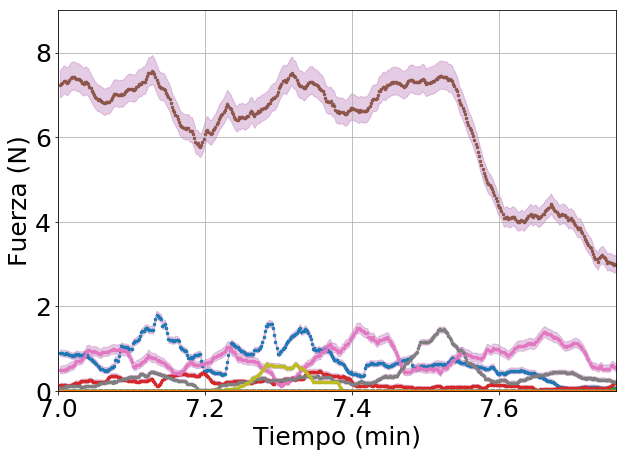

In [0]:
ini, fin = 5600, 6075
plt.figure(figsize=(10,7))
for j in [1,2,3,4,5,6,7,8,10,11,12,15]:
  #plt.errorbar(tiempo, F_medio[:,j], yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  #plt.fill_between(t_filt[:], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='purple', alpha=0.2)
  plt.fill_between(t_filt[ini:fin]-t_filt[1215], s_filt[ini:fin,j]-err_sinf_filt[ini:fin,j], s_filt[ini:fin,j]+err_ssup_filt[ini:fin,j], color='y', alpha=0.3)
  #plt.fill_between(t_filt, err_sinf_filt[:,j], err_ssup_filt[:,j], color='purple', alpha=0.2)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  #plt.plot(t_filt[:], s_filt[:,j],'.',label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.plot(t_filt[ini:fin]-t_filt[1215], s_filt[ini:fin,j],'.', markersize=5, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  #plt.legend(fontsize=15, markerscale=5)#loc='upper left')
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  #plt.rc('legend',fontsize=20)
#plt.savefig('todos_crudo.png')
plt.grid()
plt.xlim(7,7.76)
plt.ylim(0,9)
#plt.savefig('Sarmiento_prom_0-12.png')
plt.savefig('Sarmiento_prom_7-7.76_zoom.png')
plt.show()

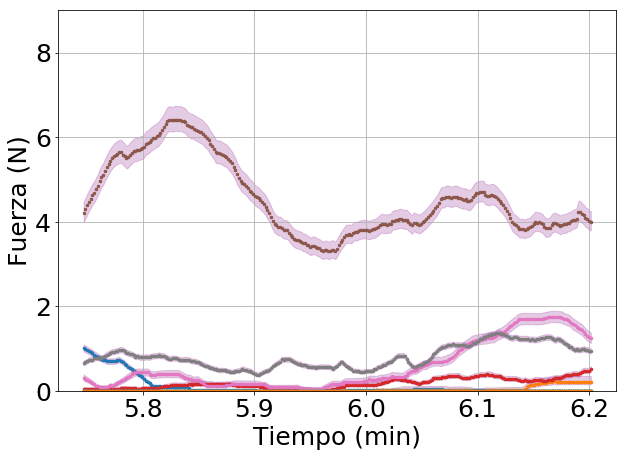

In [0]:
ini, fin = 4815, 5100
plt.figure(figsize=(10,7))
for j in [1,2,3,4,5,6,7,8,10,11,12,15]:
  #plt.errorbar(tiempo, F_medio[:,j], yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  #plt.fill_between(t_filt[:], s_filt[:,j]-err_sinf_filt[:,j], s_filt[:,j]+err_ssup_filt[:,j], color='purple', alpha=0.2)
  plt.fill_between(t_filt[ini:fin]-t_filt[1215], s_filt[ini:fin,j]-err_sinf_filt[ini:fin,j], s_filt[ini:fin,j]+err_ssup_filt[ini:fin,j], color='y', alpha=0.3)
  #plt.fill_between(t_filt, err_sinf_filt[:,j], err_ssup_filt[:,j], color='purple', alpha=0.2)
  #plt.plot(tiempo, subteB16[:,j+1]*40/1023,'*')#,label=str(i))
  #plt.plot(t_filt[:], s_filt[:,j],'.',label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.plot(t_filt[ini:fin]-t_filt[1215], s_filt[ini:fin,j], '.', markersize=5, color=color[j], label='S'+str(j))#, yerr=[inf[:,j],sup[:,j]], fmt='bo', ecolor='c', label=label_sens[j])
  plt.rc('font', **font)
  plt.xlabel('Tiempo (min)')
  plt.ylabel('Fuerza (N)')
  #plt.legend()#loc='upper left')
  plt.rc('axes',labelsize=25)
  plt.rc('xtick',labelsize=25)
  plt.rc('ytick',labelsize=25)
  #plt.rc('legend',fontsize=20)
#plt.savefig('todos_crudo.png')
plt.grid()
#plt.xlim(0,13)
plt.ylim(0,9)
#plt.savefig('Sarmiento_prom_0-12.png')
#plt.savefig('Sarmiento_prom_?_zoom.png')
plt.show()

In [0]:
print(t_filt[5615]-t_filt[1215])

7.02648791666666


NameError: ignored

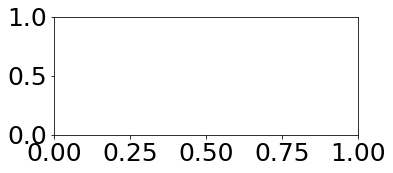

In [0]:
plt.figure(figsize=(12,10))

plt.subplot(421)
for i in range(3):
  plt.plot(martes_t1[:,0]/1000, martes_t1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 1')
  plt.grid()
  
plt.subplot(422)
for i in range(3):
  plt.plot(martes_t2[:,0]/1000, martes_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 2')
  plt.grid()
  
plt.subplot(423)
for i in range(3):
  plt.plot(miercoles_m1[:,0]/1000, miercoles_m1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 1')
  plt.grid()
  
plt.subplot(424)
for i in range(3):
  plt.plot(miercoles_m2[:,0]/1000, miercoles_m2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 3')
  plt.grid()
  
plt.subplot(425)
for i in range(3):
  plt.plot(miercoles_t1[:,0]/1000, miercoles_t1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 2')
  plt.grid()
  
plt.subplot(426)
for i in range(3):
  plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Miercoles a la mañana')
  plt.grid()
  
plt.subplot(427)
for i in range(3):
  plt.plot(otras1[:,0]/1000, otras1[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Chau 3')
  plt.grid()
  
plt.subplot(428)
for i in range(3):
  plt.plot(otras2[:,0]/1000, otras2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Miercoles a la tarde')
  
plt.tight_layout()
plt.grid()
plt.show()

In [0]:
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

def prediccion(parametros,covarianza):
  fuerza=np.arange(0,50,0.005)
  err_f=0.05
  yp,sigma_yp,U,L=np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza)),np.zeros(len(fuerza))
  
  for i in range(len(fuerza)):
    yp[i],sigma_yp[i]=prediccion_exp(fuerza[i],err_f,parametros,covarianza)
    U[i]=yp[i]+sigma_yp[i]
    L[i]=yp[i]-sigma_yp[i]
  return(L,U)
  
def conversion(voltajes,L,U,parametros):
  fuerza=np.arange(0,50,0.005)
  F_medio,F_inf,F_sup=[],[],[]
  for voltaje in voltajes:
    F_medio.append(inversa(voltaje,parametros[0],parametros[1],parametros[2]))
  
    if (U[0]<=voltaje)&(U[-1]>=voltaje):
      F_inf.append(fuerza[np.where(U>=voltaje)[0][0]])
    elif(U[0]>=voltaje):
      F_inf.append(0)
    else:
      F_inf.append(50)
    if (L[0]<=voltaje)&(L[-1]>=voltaje):
      F_sup.append(fuerza[np.where(L>=voltaje)[0][0]])
    elif (L[-1]<=voltaje):
      F_sup.append(1000)
    else:
      F_sup.append(L[0])
      
  inf_sup=np.zeros((2,len(F_sup)))
  inf_sup[0,:]=np.abs(np.array(F_medio)-np.array(F_inf))
  inf_sup[1,:]=np.abs(np.array(F_sup)-np.array(F_medio))
  return(F_medio,F_inf,F_sup,inf_sup)

In [0]:
"""
parametros=[[0.20732125455452075, -0.5083621908479562, 0.12178757773324396],
 [0.032104612243850604, -0.5744989446168263, 0.14131027668198146],
 [0.045866540781650714, -0.6258922120890085, 0.14657452145356473],
 [0.6170848232934036, -0.5248583272853323, 0.13751484559436442],
 [0.08284345971081528, -0.8058540344712757, 0.21218991389160202],
 [0.12495234323892684, -0.647819007612043, 0.15200683996128367],
 [0.3696501832032804, -1.1729819007105917, 0.2959731411633668],
 [0.6708958784476033, -0.5444575982205117, 0.1571482320176621],
 [0.5183787227195186, -0.8612107374370299, 0.22203696743605036]]
"""

In [0]:
"""
covarianza=[np.array([[ 3.75312134e-04,  1.19395120e-04, -1.93996290e-05],
        [ 1.19395120e-04,  9.57085829e-05, -2.21032094e-05],
        [-1.93996290e-05, -2.21032094e-05,  5.63124493e-06]]),
np.array([[ 1.50664176e-04,  5.60948466e-05, -1.01072065e-05],
        [ 5.60948466e-05,  1.56250993e-04, -4.56932882e-05],
        [-1.01072065e-05, -4.56932882e-05,  1.41236010e-05]]),
np.array([[ 2.19922844e-04,  7.39230891e-05, -1.05789725e-05],
        [ 7.39230891e-05,  9.43043678e-05, -2.19591502e-05],
        [-1.05789725e-05, -2.19591502e-05,  5.54223131e-06]]),
np.array([[ 1.54862403e-03,  4.74750246e-04, -7.51271219e-05],
        [ 4.74750246e-04,  1.94250939e-04, -3.79597576e-05],
        [-7.51271219e-05, -3.79597576e-05,  8.43983393e-06]]),
np.array([[ 6.70444045e-04,  4.03562743e-04, -8.08628377e-05],
        [ 4.03562743e-04,  6.94219471e-04, -1.97519388e-04],
        [-8.08628377e-05, -1.97519388e-04,  6.15892502e-05]]),
np.array([[ 3.84934392e-04,  1.32886452e-04, -1.84294477e-05],
        [ 1.32886452e-04,  2.40026423e-04, -5.58394770e-05],
        [-1.84294477e-05, -5.58394770e-05,  1.37833057e-05]]),
np.array([[ 0.00743473,  0.00471743, -0.00064978],
        [ 0.00471743,  0.00444051, -0.00079403],
        [-0.00064978, -0.00079403,  0.00015984]]),
np.array([[ 0.001734  ,  0.00066821, -0.00013412],
        [ 0.00066821,  0.00130675, -0.00043571],
        [-0.00013412, -0.00043571,  0.00015622]]),
np.array([[ 1.45112905e-03,  6.61026136e-04, -8.96022576e-05],
        [ 6.61026136e-04,  1.70037893e-03, -4.17552902e-04],
        [-8.96022576e-05, -4.17552902e-04,  1.08437348e-04]])]
"""

In [0]:
max(miercoles_t2[:,3]*5/1023)

4.320625610948191

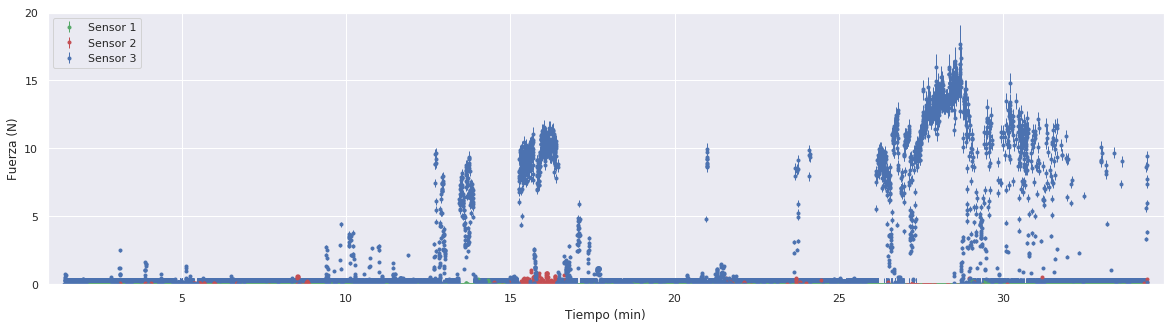

In [0]:
s1, par1, cov1 = miercoles_t2[:,1]*5/1023, parametros[2], covarianza[2]
s2, par2, cov2 = miercoles_t2[:,2]*5/1023, parametros[5], covarianza[5]
s3, par3, cov3 = miercoles_t2[:,3]*5/1023, parametros[8], covarianza[8]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(20,5))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

#plt.errorbar(miercoles_t2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='b.',linewidth=1,label='S1 Señal calibrada')
#plt.errorbar(miercoles_t2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='b.',linewidth=1,label='Sensor 3')
plt.axvline(300)

#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,1]*5/1023, 'c.')
#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,2]*20/1023, '.', color='orange')
#plt.plot(miercoles_t2[:,0]/1000, miercoles_t2[:,3]*20/1023, 'y.')

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (min)')
plt.ylabel('Fuerza (N)')
plt.xlim(miercoles_t2[0,0]/60000-0.5,miercoles_t2[-1,0]/60000+0.5)
plt.ylim(0,20)
plt.grid()
plt.legend(loc='upper left')
plt.rc('axes',labelsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend',fontsize=20)
plt.grid()
#plt.savefig('miercoles_mañana.png')

In [0]:
len(martes_t2[:,2])

2289

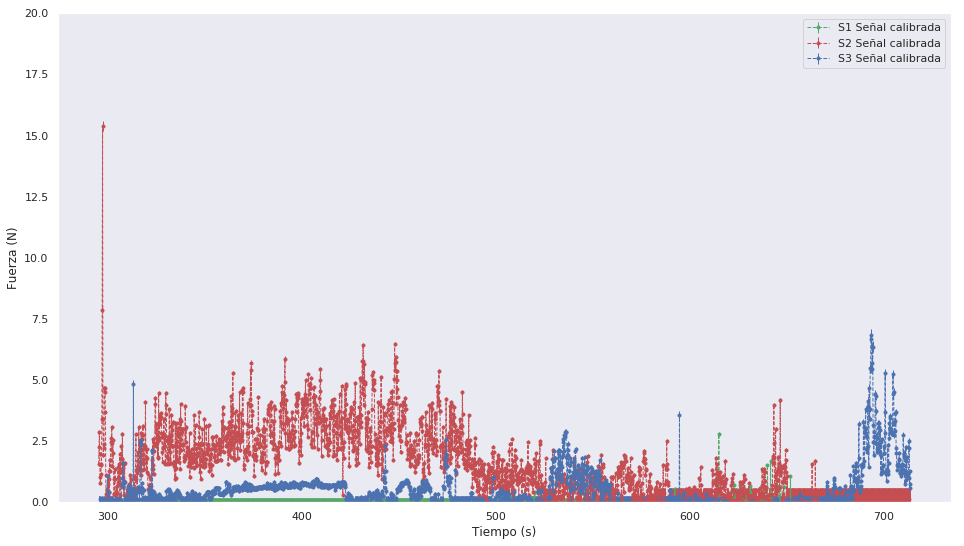

In [0]:
s1, par1, cov1 = martes_t2[:,1]*5/1023, parametros[0], covarianza[0]
s2, par2, cov2 = martes_t2[:,2]*5/1023, parametros[3], covarianza[3]
s3, par3, cov3 = martes_t2[:,3]*5/1023, parametros[6], covarianza[6]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(16,9))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

plt.errorbar(martes_t2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='g.--',linewidth=1,label='S1 Señal calibrada')
plt.errorbar(martes_t2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.--',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(martes_t2[:,0]/1000,F_medio3,yerr=inf_sup3,fmt='b.--',linewidth=1,label='S3 Señal calibrada')
"""
plt.plot(martes_t2[:,0]/1000,F_medio1, 'b.')
plt.plot(martes_t2[:,0]/1000,F_medio2, 'r.')
plt.plot(martes_t2[:,0]/1000,F_medio3, 'g.')

plt.plot(martes_t2[:,0]/1000, martes_t2[:,1]*5/1023, 'b.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,2]*5/1023, 'r.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,3]*5/1023, 'g.')
"""

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza (N)')
plt.ylim(0,20)
plt.grid()
plt.legend()
#plt.savefig('prueba_cal_S2.png')

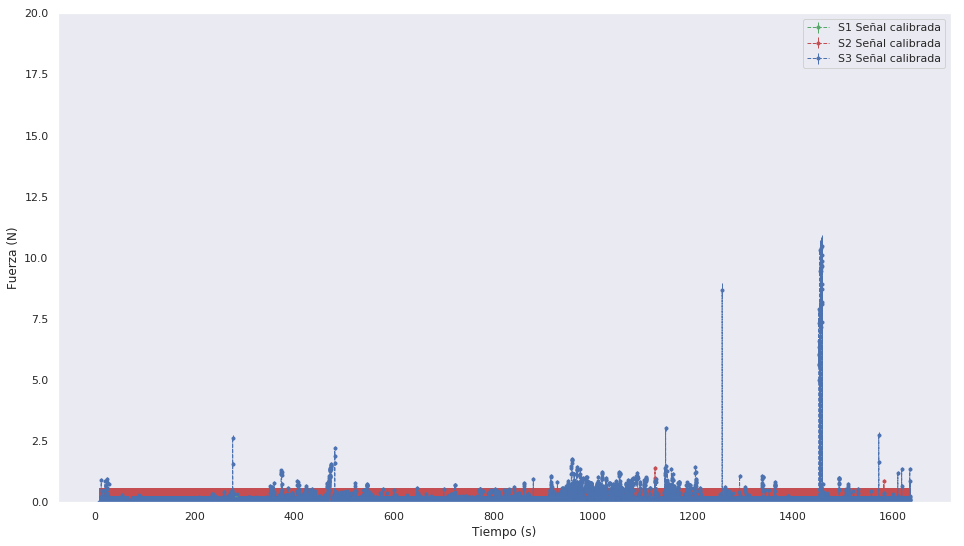

In [0]:
s1, par1, cov1 = otras2[:,1]*5/1023, parametros[0], covarianza[0]
s2, par2, cov2 = otras2[:,2]*5/1023, parametros[3], covarianza[3]
s3, par3, cov3 = otras2[:,3]*5/1023, parametros[6], covarianza[6]

L1, U1 = prediccion(par1,cov1)
F_medio1, F_inf1, F_sup1, inf_sup1 = conversion(s1,L1,U1,par1)

L2, U2 = prediccion(par2,cov2)
F_medio2, F_inf2, F_sup2, inf_sup2 = conversion(s2,L2,U2,par2)

L3, U3 = prediccion(par3,cov3)
F_medio3, F_inf3, F_sup3, inf_sup3 = conversion(s3,L3,U3,par3)

plt.figure(figsize=(16,9))
#plt.plot(Tiempo_Sensor[5],F_medio,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_inf,'.',label='Señal calibrada')
#plt.plot(Tiempo_Sensor[5],F_sup,'.',label='Señal calibrada')


#plt.errorbar(Tiempo_Vernier[5],Fuerza_Vernier[5],yerr=0.05,fmt='ro--',label='Fuerza Vernier')

plt.errorbar(otras2[:,0]/1000,F_medio1,yerr=inf_sup1,fmt='g.--',linewidth=1,label='S1 Señal calibrada')
plt.errorbar(otras2[:,0]/1000,F_medio2,yerr=inf_sup2,fmt='r.--',linewidth=1,label='S2 Señal calibrada')
plt.errorbar(otras2[:,0]/1000,F_medio3,yerr=inf_sup3,fmt='b.--',linewidth=1,label='S3 Señal calibrada')
"""
plt.plot(martes_t2[:,0]/1000,F_medio1, 'b.')
plt.plot(martes_t2[:,0]/1000,F_medio2, 'r.')
plt.plot(martes_t2[:,0]/1000,F_medio3, 'g.')

plt.plot(martes_t2[:,0]/1000, martes_t2[:,1]*5/1023, 'b.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,2]*5/1023, 'r.')
plt.plot(martes_t2[:,0]/1000, martes_t2[:,3]*5/1023, 'g.')
"""

#plt.fill_between(Tiempo_Sensor[5], F_inf, F_sup, color='blue', alpha=0.2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fuerza (N)')
plt.ylim(0,20)
plt.grid()
plt.legend()
#plt.savefig('prueba_cal_S2.png')

In [0]:
def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x 

In [0]:
inversa(2,par1[0], par1[1], par1[2])

4.607928607951207

In [0]:
conversion([2,4,5,3,2,1,4,3], L1, U2, par1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


([4.607928607951207,
  19.6455192230347,
  nan,
  9.079345159745136,
  4.607928607951207,
  1.7292294082153539,
  19.6455192230347,
  9.079345159745136],
 [3.2, 15.610000000000001, 50, 7.025, 3.2, 0.685, 15.610000000000001, 7.025],
 [4.695, 19.95, 1000, 9.215, 4.695, 1.795, 19.95, 9.215],
 array([[1.40792861, 4.03551922,        nan, 2.05434516, 1.40792861,
         1.04422941, 4.03551922, 2.05434516],
        [0.08707139, 0.30448078,        nan, 0.13565484, 0.08707139,
         0.06577059, 0.30448078, 0.13565484]]))

In [0]:
#data0.head() #imprime las primeras 5 filas
#data0.tail() #imprime las ultimas 5 filas
#data0.sample(6) #imprime 6 filas random
#data0['tiempo'] #imprime la columna con el head 'tiempo'
#data0.tiempo #idem anterior
#data0.index[data0.isnull().tiempo] #detecta lineas vacias
#eval('nombre') #evalua la variable que se llame nombre

In [0]:
1/N  * np.sqrt(sum(errores**2))

In [0]:
def sliding_mean(data_array, window, error_sup):
#    data_array = array(data_array)
    new_list = []
    err_filtrado =[]
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        err = 0
        for j in indices:
            avg += data_array[j]
            err += error_sup[j]**2
            
        avg /= float(len(indices))
        err_prop = np.sqrt(err) / float(len(indices))
        new_list.append(avg)
        err_filtrado.append(err_prop)
    
       
    return new_list, err_filtrado

  
def sliding_mean_sin_error(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list
#mydata_smooth=sliding_mean(mydata[:,0],10) #para invocar la función

In [0]:
plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='b.',linewidth=1,label='Sensor 3')

In [0]:
ventana = 30
s1_filt, errs1 = sliding_mean(F_medio1, ventana, inf_sup1[1])
s2_filt, errs2  = sliding_mean(F_medio2, ventana, inf_sup1[1])
s3_filt, errs3 = sliding_mean(F_medio3, ventana, inf_sup1[1])
tiempo_filt = sliding_mean_sin_error(miercoles_t2[:,0]/60000, ventana)

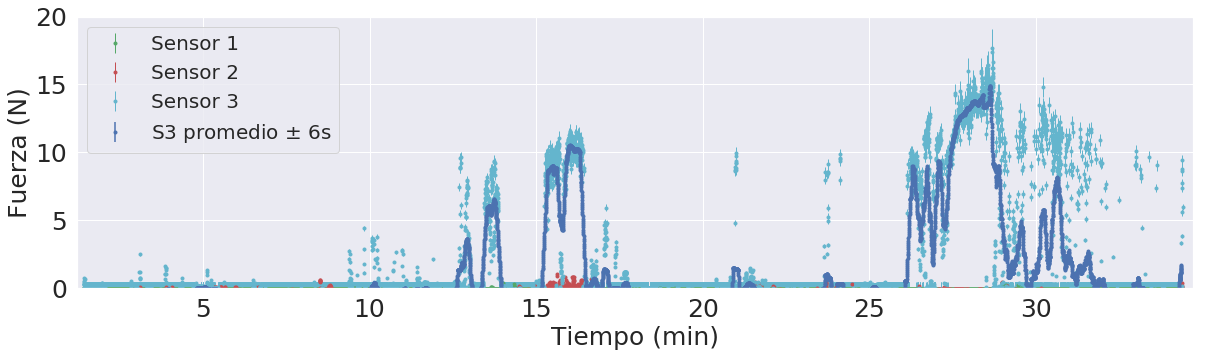

In [0]:
plt.figure(figsize=(20,5))

plt.errorbar(miercoles_t2[:,0]/60000,F_medio1,yerr=inf_sup1,fmt='g.',linewidth=1,label='Sensor 1')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio2,yerr=inf_sup2,fmt='r.',linewidth=1,label='Sensor 2')
plt.errorbar(miercoles_t2[:,0]/60000,F_medio3,yerr=inf_sup3,fmt='c.',linewidth=1,label='Sensor 3')

#plt.errorbar(tiempo_filt, s1_filt, yerr=errs1, fmt='g.', label='S1 promedio')
#plt.errorbar(tiempo_filt, s2_filt, yerr=errs2, fmt='r.', label='S2 promedio')
plt.errorbar(tiempo_filt, s3_filt, yerr=errs3, fmt='b.', label='S3 promedio $\pm$ 6s')
plt.grid()
plt.xlabel('Tiempo (min)')
plt.ylabel('Fuerza (N)')
plt.legend()

#plt.title('Datos filtrados de los sensores')
plt.grid()
plt.xlim(miercoles_t2[0,0]/60000-0.2,miercoles_t2[-1,0]/60000+0.3)
plt.ylim(0,20)
#plt.savefig('crudos_proms.png')
plt.show()

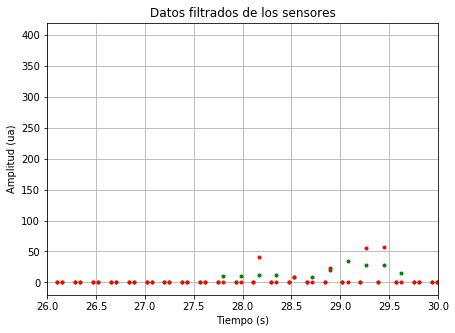

In [0]:
plt.figure(figsize=(7,5))
plt.plot(data0.tiempo/1000, filtro_s1, '.g')
plt.plot(data0.tiempo/1000, data0.s1, '.r')
#plt.plot(data0.tiempo, filtro_s2, '.b')
#plt.plot(data0.tiempo, filtro_s3, '.g')
#plt.plot(data0.tiempo, filtro_s4, '.y')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (ua)')
plt.title('Datos filtrados de los sensores')
plt.xlim(26, 30)
plt.grid()
plt.show()

In [0]:
#busco indices donde para de medir para cada masa
"""
empty=[]

for i in range(4):
  empty.append([0]+list(eval('data'+str(i)).index[eval('data'+str(i)).isnull().tiempo]))

print(empty)
"""

"\nempty=[]\n\nfor i in range(4):\n  empty.append([0]+list(eval('data'+str(i)).index[eval('data'+str(i)).isnull().tiempo]))\n\nprint(empty)\n"

In [0]:
"""
for i in range(3):
  
  promedio=[]
  for j in range(len(empty[i])-1):
    promedio.append(np.mean(eval('data'+str(i)).lectura[empty[i][j]:empty[i][j+1]]))

  means.append(promedio)
  masas.append(masa[i]*np.ones(len(promedio)))
"""

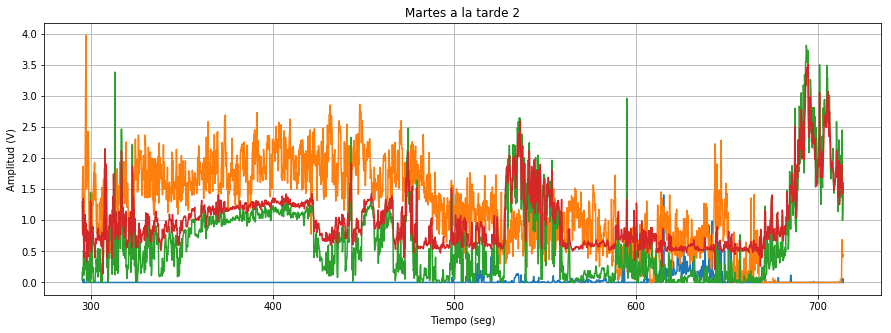

In [0]:
plt.figure(figsize=(15,5))
for i in range(4):
  plt.plot(martes_t2[:,0]/1000, martes_t2[:,i+1]*5/1023)
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Amplitud (V)')
  plt.title('Martes a la tarde 2')
  #plt.xlim(300,500)

 
plt.grid()
plt.show()

In [0]:
parametros=[[0.2567413988351364, -0.5027925403912138, 0.12306860893280448],
 [0.5994626005078386, -0.5552524341046066, 0.1459786848992154],
 [0.5916142259901637, -0.9218208751408562, 0.24568312094336148],
 [0.22535422081340992, -0.5417281995840768, 0.13266908030153945],
 [0.2089022897582426, -0.596243662889203, 0.142933668263071],
 [0.9243147648912522, -0.6950234790444985, 0.20123586066032564]]

In [0]:
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/k)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

  
def prediccion_pol(x,error_x,params,cov_params):
    df=df_pol(x,params)
    Y=params[0]*x**4+params[1]*x**3+params[2]*x**2+params[3]*x
    sigma_Y=np.sqrt((df[0]**2)*cov_params[0,0]+(df[1]**2)*cov_params[1,1]
                    +((df[2]**2)*cov_params[2,2])+((df[3]**2)*cov_params[3,3])
                   +2*df[0]*df[1]*cov_params[0,1]+2*df[0]*df[2]*cov_params[0,2]
                    +2*df[0]*df[3]*cov_params[0,3]+2*df[1]*df[2]*cov_params[1,2]
                   +2*df[1]*df[3]*cov_params[1,3]+2*df[2]*df[3]*cov_params[2,3])
    return(Y,sigma_Y)
